In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns
import os
from itertools import product

from IPython.core.display import display, HTML
from IPython.display import display, Markdown, Latex

display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
#ROOT_DATA_DIR = '/Users/dhrupadbhardwaj/Data/'
ROOT_DATA_DIR = '/d/data_base/'
BASE_BASIS_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SusupBasis/')
BASE_SUPSUP_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'Supsup/')
BASE_SUPSUP_WEIGHTNORM_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupSeedWeightnorm/')
BASE_SUPSUP_SIGNED_WEIGHTNORM_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupSeedSignedWeightnorm/')
BASE_SUPSUP_HYBRID_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupSeedHybridWeightnorm/')
BASE_SUPSUP_SIGNED_HYBRID_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupSeedHybridSignedWeightnorm/')
BASE_SUPSUP_BASIS_WEIGHTNORM_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisWeightnorm/')
BASE_SUPSUP_BASIS_SIGNED_WEIGHTNORM_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisSignedWeightnorm/')
BASE_SUPSUP_BASIS_HYBRID_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisHybrid/')
BASE_SUPSUP_BASIS_SIGNED_HYBRID_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisSignedHybrid/')

In [3]:
baseline = pd.read_csv(os.path.join(BASE_SUPSUP_DATA_DIR, 'rn18-supsup', 'results.csv'))
weightnorm = pd.read_csv(os.path.join(BASE_SUPSUP_WEIGHTNORM_DATA_DIR, 'rn18-supsup', 'results.csv'))
sweightnorm = pd.read_csv(os.path.join(BASE_SUPSUP_SIGNED_WEIGHTNORM_DATA_DIR, 'rn18-supsup', 'results.csv'))
hybrid = pd.read_csv(os.path.join(BASE_SUPSUP_HYBRID_DATA_DIR, 'rn18-supsup', 'results.csv'))
shybrid = pd.read_csv(os.path.join(BASE_SUPSUP_SIGNED_HYBRID_DATA_DIR, 'rn18-supsup', 'results.csv'))

In [4]:
basis = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_BASIS_DATA_DIR) if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_wn = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_SUPSUP_BASIS_WEIGHTNORM_DATA_DIR) if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_swn = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_SUPSUP_BASIS_SIGNED_WEIGHTNORM_DATA_DIR) if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_hybrid = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_SUPSUP_BASIS_HYBRID_DATA_DIR) if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_shybrid = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_SUPSUP_BASIS_SIGNED_HYBRID_DATA_DIR) if len(f[-1]) and f[-1][0] == 'results.csv'])

In [5]:
def annotate(df, ignore_masks=false, ignore_sparsity=false):
    df['task'] = df['name'].apply(lambda x: x.split('~')[-1].split('=')[-1]).astype(int)
    df['Seed'] = df['Name'].apply(lambda x: x.split('~')[1].split('=')[-1]).astype(int)
    if not ignore_sparsity:
        df['Sparsity'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(int)
    if not ignore_masks:
        df['Num Masks'] = df['Save Directory'].apply(lambda x: int(x.split('/')[6].split('_')[-1]))
    return df

In [6]:
baseline = annotate(baseline, True)
baseline = baseline[baseline['Sparsity'] != 30]
weightnorm = annotate(weightnorm, True, True)
sweightnorm = annotate(sweightnorm, True, True)
hybrid = annotate(hybrid, True)
shybrid = annotate(shybrid, True)

In [7]:
basis = annotate(basis)
basis_wn = annotate(basis_wn, ignore_sparsity=True)
basis_swn = annotate(basis_swn, ignore_sparsity=True)
basis_hybrid = annotate(basis_hybrid)
basis_shybrid = annotate(basis_shybrid)

In [8]:
basis_grp = basis.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
supsup_grp = baseline.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']

In [9]:
SEED_TASKS = 10
seen = basis[basis['Task'] < SEED_TASKS]
seen_grp = seen.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']

In [10]:
seen_grp

Sparsity        20        25        40        50        60        75  \
Task                                                                   
0         0.709222  0.693556  0.697000  0.712111  0.661111  0.713111   
1         0.704556  0.705889  0.741444  0.746222  0.775111  0.747333   
2         0.817000  0.782333  0.833333  0.854333  0.837444  0.820778   
3         0.757111  0.790222  0.762556  0.773556  0.756333  0.793333   
4         0.777333  0.779778  0.795222  0.804889  0.780556  0.804333   
5         0.753333  0.763444  0.770889  0.781111  0.776333  0.745444   
6         0.709444  0.718444  0.736333  0.742111  0.757333  0.740111   
7         0.560000  0.559778  0.569111  0.567556  0.567889  0.566667   
8         0.653111  0.664111  0.660778  0.659667  0.669667  0.687222   
9         0.595222  0.610444  0.611556  0.610667  0.628889  0.606333   

Sparsity        80        87        90        92        95        98  
Task                                                                  
0         0.727222  0.744333  0.713556  0.716111  0.739778  0.722333  
1         0.753333  0.694444  0.774889  0.729778  0.739889  0.733778  
2         0.808556  0.822000  0.858333  0.826667  0.827333  0.834111  
3         0.745667  0.811333  0.741889  0.773444  0.819333  0.789667  
4         0.791778  0.837111  0.814556  0.817222  0.809667  0.785000  
5         0.770667  0.750778  0.778000  0.790667  0.797111  0.775889  
6         0.761889  0.704111  0.766556  0.736111  0.751333  0.718222  
7         0.564222  0.566444  0.568444  0.570222  0.563000  0.578000  
8         0.660000  0.692222  0.662222  0.670222  0.660444  0.658556  
9         0.602111  0.614111  0.604000  0.604778  0.610889  0.613889

In [11]:
cm = sns.light_palette("orange", as_cmap=True)

In [12]:
SEEDS=3
for pair in sorted(list(set(set([(i,j) if i <= j else (j,i) for i,j in product([i for i in range(SEEDS)],[i for i in range(SEEDS)])]))), key=lambda x: x[0]):
    p0, p1 = pair
    if p0 == p1:
        continue
    grp = baseline.groupby(['Seed', 'Task', 'Sparsity'])[['Current Val', 'Best Val']].mean().unstack()
    corr_seen = np.corrcoef(np.array(grp.loc[p0]["Best Val"]).reshape(1, 440)[0], np.array(grp.loc[p1]["Best Val"]).reshape(1, 440)[0])[0,1]
    print('Correlations for {} masks: \n\t seeds: {}, {} \n\t\t Seen: {}'.format(SEED_TASKS, p0, p1, corr_seen))

Correlations for 10 masks: 
	 seeds: 0, 1 
		 Seen: 0.966168720780664
Correlations for 10 masks: 
	 seeds: 0, 2 
		 Seen: 0.9706883090333155
Correlations for 10 masks: 
	 seeds: 1, 2 
		 Seen: 0.9692465615410213


In [13]:
supsup = baseline.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
for masks in [3, 5, 7, 10, 12, 15]:
    subdf = basis[basis['Num Masks'] == masks]
    seen = basis[(basis['Task'] < masks)]
    unseen = basis[(basis['Task'] >= masks)]
    seen_grp = seen.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
    unseen_grp = unseen.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
    print('Performance recovery: {} masks'.format(masks))
    print(seen_grp.to_string())
    print()
    print('Delta: {} masks'.format(masks))
    print((seen_grp - supsup.loc[seen_grp.index, seen_grp.columns]).to_string())
    print()
    print()
    print('Predictive performance: {} masks'.format(masks))
    print(unseen_grp.to_string())
    print()
    print('Delta: {} masks'.format(masks))
    print((unseen_grp - supsup.loc[unseen_grp.index, unseen_grp.columns]).to_string())

Performance recovery: 3 masks
Sparsity        20        25        40        50        60        75        80        87        90        92        95        98
Task                                                                                                                            
0         0.709222  0.693556  0.697000  0.712111  0.661111  0.713111  0.727222  0.744333  0.713556  0.716111  0.739778  0.722333
1         0.704556  0.705889  0.741444  0.746222  0.775111  0.747333  0.753333  0.694444  0.774889  0.729778  0.739889  0.733778
2         0.817000  0.782333  0.833333  0.854333  0.837444  0.820778  0.808556  0.822000  0.858333  0.826667  0.827333  0.834111

Delta: 3 masks
Sparsity        20        25        40        50        60        75        80        87        90        92        95        98
Task                                                                                                                            
0        -0.176111 -0.187111 -0.187667 -0.175222 -0

19       -0.224000 -0.225667 -0.227444 -0.220556 -0.225111 -0.217667 -0.220778 -0.225222 -0.221444 -0.218222 -0.222889 -0.221333
Performance recovery: 12 masks
Sparsity        20        25        40        50        60        75        80        87        90        92        95        98
Task                                                                                                                            
0         0.709222  0.693556  0.697000  0.712111  0.661111  0.713111  0.727222  0.744333  0.713556  0.716111  0.739778  0.722333
1         0.704556  0.705889  0.741444  0.746222  0.775111  0.747333  0.753333  0.694444  0.774889  0.729778  0.739889  0.733778
2         0.817000  0.782333  0.833333  0.854333  0.837444  0.820778  0.808556  0.822000  0.858333  0.826667  0.827333  0.834111
3         0.757111  0.790222  0.762556  0.773556  0.756333  0.793333  0.745667  0.811333  0.741889  0.773444  0.819333  0.789667
4         0.777333  0.779778  0.795222  0.804889  0.780556  0.8043

In [14]:
res = pd.concat([(seen_grp - supsup.loc[seen_grp.index, seen_grp.columns]).T, (seen_grp - supsup.loc[seen_grp.index, seen_grp.columns]).mean()], axis=1)
res.columns = list(res.columns[:-1]) + ['mean']
res.T

Sparsity,20,25,40,50,60,75,80,87,90,92,95,98
0,-0.176111,-0.187111,-0.187667,-0.175222,-0.230889,-0.177556,-0.166778,-0.144333,-0.187111,-0.173222,-0.145556,-0.167000
1,-0.139444,-0.146111,-0.103889,-0.108444,-0.074889,-0.102000,-0.090667,-0.144889,-0.078444,-0.120222,-0.113444,-0.116222
2,-0.111667,-0.142333,-0.095333,-0.080333,-0.095222,-0.115222,-0.119444,-0.115333,-0.074333,-0.112000,-0.107333,-0.098556
3,-0.188889,-0.151111,-0.176778,-0.173778,-0.191667,-0.153333,-0.203000,-0.132667,-0.206111,-0.177889,-0.124667,-0.153000
4,-0.116000,-0.121556,-0.098778,-0.093111,-0.117444,-0.097000,-0.108222,-0.062889,-0.082111,-0.084111,-0.085000,-0.112333
5,-0.202667,-0.199889,-0.193778,-0.185556,-0.187667,-0.218556,-0.194667,-0.217889,-0.187333,-0.170000,-0.168222,-0.188111
6,-0.227889,-0.216222,-0.204333,-0.193222,-0.185333,-0.191889,-0.176111,-0.231222,-0.172111,-0.203889,-0.190000,-0.210444
7,-0.250667,-0.246889,-0.240889,-0.242444,-0.235444,-0.238667,-0.246444,-0.238889,-0.240222,-0.230444,-0.252333,-0.230667
8,-0.262222,-0.247889,-0.253222,-0.256333,-0.247000,-0.230778,-0.255333,-0.222444,-0.251111,-0.246444,-0.248222,-0.254111
9,-0.304111,-0.297556,-0.291111,-0.294000,-0.281778,-0.299667,-0.304556,-0.292556,-0.300000,-0.310556,-0.291778,-0.291444


In [15]:
supsup = baseline.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
masks = 3
subdf = basis[basis['Num Masks'] == masks]
seen = basis[(basis['Task'] < masks)]
unseen = basis[(basis['Task'] >= masks)]
seen_grp = seen.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
unseen_grp = unseen.groupby(['Task', 'Sparsity'])[['Best Val']].mean().unstack()['Best Val']
print('Performance recovery: {} masks'.format(masks))
res = pd.concat([seen_grp .T, seen_grp.mean()], axis=1)
res.columns = list(res.columns[:-1]) + ['mean']
print(res.T.to_string())
print()
print('Delta: {} masks'.format(masks))
res = pd.concat([(seen_grp - supsup.loc[seen_grp.index, seen_grp.columns]).T, (seen_grp - supsup.loc[seen_grp.index, seen_grp.columns]).mean()], axis=1)
res.columns = list(res.columns[:-1]) + ['mean']
print(res.T.to_string())
print()
print()
print('Predictive performance: {} masks'.format(masks))
res = pd.concat([unseen_grp .T, unseen_grp.mean()], axis=1)
res.columns = list(res.columns[:-1]) + ['mean']
print(res.T.to_string())
print()
print('Delta: {} masks'.format(masks))
res = pd.concat([(unseen_grp - supsup.loc[unseen_grp.index, unseen_grp.columns]).T, (unseen_grp - supsup.loc[unseen_grp.index, unseen_grp.columns]).mean()], axis=1)
res.columns = list(res.columns[:-1]) + ['mean']
print(res.T.to_string())

Performance recovery: 3 masks
Sparsity        20        25        40        50        60        75        80        87        90        92        95        98
0         0.709222  0.693556  0.697000  0.712111  0.661111  0.713111  0.727222  0.744333  0.713556  0.716111  0.739778  0.722333
1         0.704556  0.705889  0.741444  0.746222  0.775111  0.747333  0.753333  0.694444  0.774889  0.729778  0.739889  0.733778
2         0.817000  0.782333  0.833333  0.854333  0.837444  0.820778  0.808556  0.822000  0.858333  0.826667  0.827333  0.834111
mean      0.743593  0.727259  0.757259  0.770889  0.757889  0.760407  0.763037  0.753593  0.782259  0.757519  0.769000  0.763407

Delta: 3 masks
Sparsity        20        25        40        50        60        75        80        87        90        92        95        98
0        -0.176111 -0.187111 -0.187667 -0.175222 -0.230889 -0.177556 -0.166778 -0.144333 -0.187111 -0.173222 -0.145556 -0.167000
1        -0.139444 -0.146111 -0.103889 -0.108444 -0

In [16]:
for masks in [3, 5, 7, 10, 12, 15]:
    SEED_TASKS = masks
    SEEDS = 3
    for pair in sorted(list(set(set([(i,j) if i <= j else (j,i) for i,j in product([i for i in range(SEEDS)],[i for i in range(SEEDS)])]))), key=lambda x: x[0]):
        p0, p1 = pair
        if p0 == p1:
            continue
        subdf = basis[basis['Num Masks'] == SEED_TASKS]
        grp_unseen = basis[(basis['Task'] >= SEED_TASKS)].groupby(['Seed', 'Task', 'Sparsity'])[['Current Val', 'Best Val']].mean().unstack()
        grp_seen = basis[(basis['Task'] < SEED_TASKS)].groupby(['Seed', 'Task', 'Sparsity'])[['Current Val', 'Best Val']].mean().unstack()
        corr_seen = np.corrcoef(np.array(grp_seen.loc[p0]["Best Val"]).reshape(1, 12*(SEED_TASKS))[0], np.array(grp_seen.loc[p1]["Best Val"]).reshape(1, 12*(SEED_TASKS))[0])[0,1]
        corr_unseen = np.corrcoef(np.array(grp_unseen.loc[p0]["Best Val"]).reshape(1, 12*(20 - SEED_TASKS))[0], np.array(grp_unseen.loc[p1]["Best Val"]).reshape(1, 12*(20 - SEED_TASKS))[0])[0,1]
        print('Correlations for {} masks: \n\t seeds: {}, {} \n\t\t Seen: {} \n\t\t Unseen: {}'.format(SEED_TASKS, p0, p1, corr_seen, corr_unseen))

Correlations for 3 masks: 
	 seeds: 0, 1 
		 Seen: 0.7243182294956341 
		 Unseen: 0.9561129491085235
Correlations for 3 masks: 
	 seeds: 0, 2 
		 Seen: 0.8034027055463872 
		 Unseen: 0.9468298551143869
Correlations for 3 masks: 
	 seeds: 1, 2 
		 Seen: 0.6481761301347337 
		 Unseen: 0.9533532441144933
Correlations for 5 masks: 
	 seeds: 0, 1 
		 Seen: 0.6644447662954869 
		 Unseen: 0.9558409220271016
Correlations for 5 masks: 
	 seeds: 0, 2 
		 Seen: 0.7051188081603393 
		 Unseen: 0.953076248923343
Correlations for 5 masks: 
	 seeds: 1, 2 
		 Seen: 0.56717695184148 
		 Unseen: 0.9683516101735136
Correlations for 7 masks: 
	 seeds: 0, 1 
		 Seen: 0.6033352342492426 
		 Unseen: 0.9767769308787596
Correlations for 7 masks: 
	 seeds: 0, 2 
		 Seen: 0.6497151078311364 
		 Unseen: 0.9689423169979228
Correlations for 7 masks: 
	 seeds: 1, 2 
		 Seen: 0.5647295707947402 
		 Unseen: 0.9777965725241482
Correlations for 10 masks: 
	 seeds: 0, 1 
		 Seen: 0.9099508766588884 
		 Unseen: 0.983210450

## Basline Supsup vs Soft Mask Supsup 

In [17]:
res_baseline = baseline.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack()

In [18]:
weightnorm.groupby(['Task'])['Best Val'].mean()

Task
0     0.870000
1     0.837667
2     0.927000
3     0.929000
4     0.893333
5     0.956000
6     0.927333
7     0.788000
8     0.890667
9     0.874000
10    0.942333
11    0.824000
12    0.882333
13    0.869667
14    0.871333
15    0.911667
16    0.864667
17    0.932000
18    0.929000
19    0.822333
Name: Best Val, dtype: float64

In [19]:
res_wtnorm = pd.concat([weightnorm.groupby(['Task'])['Best Val'].mean()]*len(baseline.Sparsity.unique()), axis=1)
res_wtnorm.columns = res_baseline.columns

In [20]:
cm = sns.light_palette("orange", as_cmap=True)

In [21]:
wtnorm_comp = (res_baseline - res_wtnorm.reindex(res_baseline.index))[basis_grp.columns]#.style.background_gradient(cm)[[basis]]

In [22]:
wtnorm_comp.style.background_gradient(cm)

Sparsity,20,25,40,50,60,75,80,87,90,92,95,98
Task,,,,,,,,,,,,
0,0.015333,0.010667,0.014667,0.017333,0.022000,0.020667,0.024000,0.018667,0.030667,0.019333,0.015333,0.019333
1,0.006333,0.014333,0.007667,0.017000,0.012333,0.011667,0.006333,0.001667,0.015667,0.012333,0.015667,0.012333
2,0.001667,-0.002333,0.001667,0.007667,0.005667,0.009000,0.001000,0.010333,0.005667,0.011667,0.007667,0.005667
3,0.017000,0.012333,0.010333,0.018333,0.019000,0.017667,0.019667,0.015000,0.019000,0.022333,0.015000,0.013667
4,0.000000,0.008000,0.000667,0.004667,0.004667,0.008000,0.006667,0.006667,0.003333,0.008000,0.001333,0.004000
5,0.000000,0.007333,0.008667,0.010667,0.008000,0.008000,0.009333,0.012667,0.009333,0.004667,0.009333,0.008000
6,0.010000,0.007333,0.013333,0.008000,0.015333,0.004667,0.010667,0.008000,0.011333,0.012667,0.014000,0.001333
7,0.022667,0.018667,0.022000,0.022000,0.015333,0.017333,0.022667,0.017333,0.020667,0.012667,0.027333,0.020667
8,0.024667,0.021333,0.023333,0.025333,0.026000,0.027333,0.024667,0.024000,0.022667,0.026000,0.018000,0.022000


## Baseline Supsup vs Signed Soft-Mask Supsup

In [23]:
res_baseline = baseline.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack()

In [24]:
sweightnorm.groupby(['Task'])['Best Val'].mean()

Task
0     0.870667
1     0.838667
2     0.924000
3     0.927667
4     0.895667
5     0.959000
6     0.923667
7     0.792667
8     0.892000
9     0.866333
10    0.944333
11    0.829333
12    0.894667
13    0.868333
14    0.869667
15    0.915667
16    0.870000
17    0.929000
18    0.923333
19    0.828667
Name: Best Val, dtype: float64

In [25]:
res_swtnorm = pd.concat([sweightnorm.groupby(['Task'])['Best Val'].mean()]*len(baseline.Sparsity.unique()), axis=1)
res_swtnorm.columns = res_baseline.columns

In [26]:
cm = sns.light_palette("orange", as_cmap=True)

In [27]:
swtnorm_comp = (res_baseline - res_swtnorm.reindex(res_baseline.index))[basis_grp.columns]#.style.background_gradient(cm)[[basis]]

In [28]:
swtnorm_comp.style.background_gradient(cm)

Sparsity,20,25,40,50,60,75,80,87,90,92,95,98
Task,,,,,,,,,,,,
0,0.014667,0.010000,0.014000,0.016667,0.021333,0.020000,0.023333,0.018000,0.030000,0.018667,0.014667,0.018667
1,0.005333,0.013333,0.006667,0.016000,0.011333,0.010667,0.005333,0.000667,0.014667,0.011333,0.014667,0.011333
2,0.004667,0.000667,0.004667,0.010667,0.008667,0.012000,0.004000,0.013333,0.008667,0.014667,0.010667,0.008667
3,0.018333,0.013667,0.011667,0.019667,0.020333,0.019000,0.021000,0.016333,0.020333,0.023667,0.016333,0.015000
4,-0.002333,0.005667,-0.001667,0.002333,0.002333,0.005667,0.004333,0.004333,0.001000,0.005667,-0.001000,0.001667
5,-0.003000,0.004333,0.005667,0.007667,0.005000,0.005000,0.006333,0.009667,0.006333,0.001667,0.006333,0.005000
6,0.013667,0.011000,0.017000,0.011667,0.019000,0.008333,0.014333,0.011667,0.015000,0.016333,0.017667,0.005000
7,0.018000,0.014000,0.017333,0.017333,0.010667,0.012667,0.018000,0.012667,0.016000,0.008000,0.022667,0.016000
8,0.023333,0.020000,0.022000,0.024000,0.024667,0.026000,0.023333,0.022667,0.021333,0.024667,0.016667,0.020667


## Baseline Supsup vs Hybrid Soft Mask Supsup

In [29]:
res_baseline = baseline.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack()

In [30]:
cm = sns.light_palette("orange", as_cmap=True)

In [31]:
hybrid_norm_comp = (res_baseline - hybrid.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack()).dropna(axis=1)

In [32]:
hybrid_norm_comp[basis_grp.columns].style.background_gradient(cm)

Sparsity,20,25,40,50,60,75,80,87,90,92,95,98
Task,,,,,,,,,,,,
0,0.010667,0.002333,0.005333,0.005667,0.010667,0.011333,0.015000,0.005000,0.021333,0.011667,0.010667,0.004000
1,0.005333,0.014333,0.007667,0.019000,0.003333,0.007333,0.003333,0.003000,0.014000,0.010333,0.018000,0.012000
2,-0.001667,-0.005667,-0.002667,0.001333,0.002667,0.007667,0.000000,0.007333,0.007000,0.011667,0.012667,0.008333
3,0.010667,0.005333,0.002667,0.014000,0.018333,0.016000,0.017667,0.010000,0.016000,0.022000,0.013333,0.011333
4,-0.001333,0.007000,-0.000333,0.003333,-0.001000,0.003333,0.005000,0.002667,-0.002000,0.004000,-0.001667,0.003333
5,-0.001000,0.006333,0.005333,0.009333,0.003333,0.008333,0.005667,0.012667,0.007667,-0.000667,0.009667,0.007000
6,0.005667,0.007667,0.010667,0.004667,0.010000,0.002333,0.015667,0.001000,0.006000,0.010000,0.011333,-0.002000
7,0.012667,0.007333,0.008667,0.011667,0.008667,0.005000,0.016000,0.014000,0.014333,0.002333,0.017667,0.017333
8,0.020667,0.019667,0.012667,0.023667,0.017000,0.023000,0.024000,0.017667,0.017000,0.022000,0.015667,0.017333


## Baseline Supsup vs Hybrid Signed Soft Mask Supsup 

In [33]:
res_baseline = baseline.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack()

In [34]:
cm = sns.light_palette("orange", as_cmap=True)

In [35]:
shybrid_norm_comp = (res_baseline - shybrid.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack()).dropna(axis=1)

In [36]:
shybrid_norm_comp[basis_grp.columns].style.background_gradient(cm)

Sparsity,20,25,40,50,60,75,80,87,90,92,95,98
Task,,,,,,,,,,,,
0,0.018000,0.023000,0.021000,0.033000,0.035667,0.034000,0.038333,0.030000,0.044000,0.031333,0.024000,0.034000
1,0.016667,0.024333,0.019333,0.029667,0.024000,0.020333,0.015333,0.012000,0.034000,0.030333,0.028333,0.019333
2,0.009333,0.010333,0.005667,0.019333,0.016000,0.015333,0.005667,0.017000,0.015333,0.022000,0.012667,0.017667
3,0.017333,0.018333,0.015333,0.026667,0.026000,0.026667,0.029000,0.022000,0.032000,0.034000,0.025667,0.025667
4,-0.003333,0.007667,0.005667,0.008333,0.011667,0.011333,0.012333,0.013000,0.005667,0.010333,0.005000,0.007333
5,0.007667,0.016000,0.018000,0.020667,0.015333,0.015667,0.020667,0.023667,0.016000,0.010667,0.023333,0.018333
6,0.016000,0.012667,0.024333,0.019333,0.029000,0.015667,0.025000,0.021333,0.019667,0.022667,0.030000,0.017333
7,0.022333,0.019000,0.023000,0.026667,0.021000,0.027333,0.030333,0.020333,0.028333,0.017000,0.032667,0.030000
8,0.036000,0.029667,0.038000,0.037333,0.039667,0.039333,0.039000,0.038333,0.031333,0.039667,0.031000,0.033000


## Basis Supsup Analysis

In [37]:
basis_grp = basis.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.868889,0.746444,0.665222,0.653333,0.666444,0.674389
1,0.832889,0.763889,0.719444,0.696500,0.702944,0.707667
2,0.932167,0.884611,0.804833,0.790167,0.764611,0.784722
3,0.634611,0.888722,0.812389,0.783722,0.772667,0.765111
4,0.675056,0.869222,0.832444,0.805056,0.814389,0.802556
5,0.647833,0.713778,0.836556,0.806778,0.807611,0.814278
6,0.588722,0.667389,0.832667,0.767389,0.784444,0.780389
7,0.489000,0.533778,0.560333,0.591278,0.609000,0.617278
8,0.575333,0.621500,0.655833,0.717278,0.707833,0.721333


### Compared to Baseline Supsup 

In [38]:
res_baseline = pd.concat([baseline.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_grp.columns

In [39]:
(res_baseline - basis_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.021626,0.144071,0.225293,0.237182,0.224071,0.216126
1,0.015535,0.084535,0.128980,0.151924,0.145480,0.140758
2,0.000379,0.047934,0.127712,0.142379,0.167934,0.147823
3,0.310904,0.056793,0.133126,0.161793,0.172848,0.180404
4,0.222702,0.028535,0.065313,0.092702,0.083369,0.095202
5,0.315197,0.249253,0.126475,0.156253,0.155419,0.148753
6,0.348035,0.269369,0.104091,0.169369,0.152313,0.156369
7,0.317212,0.272434,0.245879,0.214934,0.197212,0.188934
8,0.337758,0.291591,0.257258,0.195813,0.205258,0.191758


## Basis Supsup using Soft Masks 

In [40]:
basis_wn_grp = basis_wn.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_wn_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.872000,0.869333,0.869667,0.867667,0.840333,0.805333
1,0.834333,0.834333,0.835667,0.760000,0.812667,0.792000
2,0.924333,0.924000,0.920667,0.924000,0.898000,0.901333
3,0.625333,0.922667,0.923000,0.893667,0.924333,0.846000
4,0.689667,0.892000,0.891667,0.853333,0.873333,0.860667
5,0.666667,0.704333,0.955000,0.954667,0.931667,0.916000
6,0.588333,0.653333,0.925333,0.926667,0.897667,0.903000
7,0.484667,0.532333,0.564667,0.758000,0.786000,0.706333
8,0.575000,0.628000,0.655000,0.831000,0.832667,0.839000


### Compared to Baseline Supsup 

In [41]:
res_baseline = pd.concat([baseline.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_wn_grp.columns

In [42]:
(res_baseline - basis_wn_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.018515,0.021182,0.020848,0.022848,0.050182,0.085182
1,0.014091,0.014091,0.012758,0.088424,0.035758,0.056424
2,0.008212,0.008545,0.011879,0.008545,0.034545,0.031212
3,0.320182,0.022848,0.022515,0.051848,0.021182,0.099515
4,0.208091,0.005758,0.006091,0.044424,0.024424,0.037091
5,0.296364,0.258697,0.008030,0.008364,0.031364,0.047030
6,0.348424,0.283424,0.011424,0.010091,0.039091,0.033758
7,0.321545,0.273879,0.241545,0.048212,0.020212,0.099879
8,0.338091,0.285091,0.258091,0.082091,0.080424,0.074091


### Compared to Basis Supsup with Hard Masks

In [135]:
res_baseline = pd.concat([basis.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_wn_grp.columns

In [136]:
(res_baseline - basis_wn_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,-0.159546,-0.156880,-0.157213,-0.155213,-0.127880,-0.092880
1,-0.097111,-0.097111,-0.098444,-0.022778,-0.075444,-0.054778
2,-0.097481,-0.097148,-0.093815,-0.097148,-0.071148,-0.074481
3,0.150870,-0.146463,-0.146796,-0.117463,-0.148130,-0.069796
4,0.110120,-0.092213,-0.091880,-0.053546,-0.073546,-0.060880
5,0.104472,0.066806,-0.183861,-0.183528,-0.160528,-0.144861
6,0.148500,0.083500,-0.188500,-0.189833,-0.160833,-0.166167
7,0.082111,0.034444,0.002111,-0.191222,-0.219222,-0.139556
8,0.091519,0.038519,0.011519,-0.164481,-0.166148,-0.172481


### Compared to Soft Mask Supsup

In [45]:
res_wt = pd.concat([weightnorm.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_wt.columns = basis_wn_grp.columns

In [46]:
(res_wt - basis_wn_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,-0.002000,0.000667,0.000333,0.002333,0.029667,0.064667
1,0.003333,0.003333,0.002000,0.077667,0.025000,0.045667
2,0.002667,0.003000,0.006333,0.003000,0.029000,0.025667
3,0.303667,0.006333,0.006000,0.035333,0.004667,0.083000
4,0.203667,0.001333,0.001667,0.040000,0.020000,0.032667
5,0.289333,0.251667,0.001000,0.001333,0.024333,0.040000
6,0.339000,0.274000,0.002000,0.000667,0.029667,0.024333
7,0.303333,0.255667,0.223333,0.030000,0.002000,0.081667
8,0.315667,0.262667,0.235667,0.059667,0.058000,0.051667


## Basis Supsup using Signed Soft Masks 

In [47]:
basis_swn_grp = basis_swn.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_swn_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.577667,0.578333,0.603333,0.647333,0.643000,0.678000
1,0.602333,0.619333,0.635667,0.678000,0.677667,0.701667
2,0.672667,0.682333,0.720333,0.744333,0.761333,0.775000
3,0.631333,0.692000,0.708667,0.736667,0.743667,0.759000
4,0.668000,0.712000,0.750333,0.776667,0.776000,0.806333
5,0.648667,0.703333,0.754000,0.773000,0.785333,0.808333
6,0.583333,0.657667,0.688000,0.742667,0.759000,0.776000
7,0.475667,0.524667,0.569667,0.589000,0.607667,0.642000
8,0.575000,0.639000,0.653000,0.689333,0.706667,0.715667


### Compared to Baseline Supsup 

In [48]:
res_baseline = pd.concat([baseline.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_swn_grp.columns

In [49]:
(res_baseline - basis_swn_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.312848,0.312182,0.287182,0.243182,0.247515,0.212515
1,0.246091,0.229091,0.212758,0.170424,0.170758,0.146758
2,0.259879,0.250212,0.212212,0.188212,0.171212,0.157545
3,0.314182,0.253515,0.236848,0.208848,0.201848,0.186515
4,0.229758,0.185758,0.147424,0.121091,0.121758,0.091424
5,0.314364,0.259697,0.209030,0.190030,0.177697,0.154697
6,0.353424,0.279091,0.248758,0.194091,0.177758,0.160758
7,0.330545,0.281545,0.236545,0.217212,0.198545,0.164212
8,0.338091,0.274091,0.260091,0.223758,0.206424,0.197424


### Compared to Signed Soft Mask Supsup

In [50]:
res_swt = pd.concat([sweightnorm.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_swt.columns = basis_swn_grp.columns

In [51]:
(res_swt - basis_swn_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.293000,0.292333,0.267333,0.223333,0.227667,0.192667
1,0.236333,0.219333,0.203000,0.160667,0.161000,0.137000
2,0.251333,0.241667,0.203667,0.179667,0.162667,0.149000
3,0.296333,0.235667,0.219000,0.191000,0.184000,0.168667
4,0.227667,0.183667,0.145333,0.119000,0.119667,0.089333
5,0.310333,0.255667,0.205000,0.186000,0.173667,0.150667
6,0.340333,0.266000,0.235667,0.181000,0.164667,0.147667
7,0.317000,0.268000,0.223000,0.203667,0.185000,0.150667
8,0.317000,0.253000,0.239000,0.202667,0.185333,0.176333


## Basis Supsup using Hybrid Soft Masks 

In [52]:
basis_hybrid_grp = basis_hybrid.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_hybrid_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.869385,0.816615,0.743949,0.716718,0.680718,0.694316
1,0.828205,0.807385,0.758308,0.729179,0.728462,0.734105
2,0.896051,0.851692,0.831744,0.809692,0.796718,0.806211
3,0.640205,0.844718,0.802513,0.776821,0.766821,0.768842
4,0.682667,0.849692,0.829026,0.818872,0.822513,0.818263
5,0.654103,0.725795,0.819692,0.813436,0.805744,0.819737
6,0.597128,0.676564,0.840308,0.792000,0.786308,0.791421
7,0.490872,0.541436,0.573897,0.661641,0.652410,0.641000
8,0.576564,0.632410,0.661487,0.729744,0.733846,0.744263


In [141]:
basis_hybrid_grp = basis_hybrid[basis_hybrid.Sparsity == 25].groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_hybrid_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.862667,0.778000,0.630000,0.655333,0.670667,0.678000
1,0.846000,0.764000,0.629333,0.660667,0.682000,0.700000
2,0.917333,0.761333,0.726667,0.760667,0.765333,0.791333
3,0.640667,0.855333,0.788667,0.755333,0.748000,0.744667
4,0.678000,0.783333,0.786667,0.775333,0.793333,0.804000
5,0.654667,0.702667,0.822000,0.776667,0.800000,0.811333
6,0.570000,0.670667,0.856667,0.740667,0.765333,0.768000
7,0.484667,0.538000,0.564667,0.582667,0.599333,0.622667
8,0.582000,0.634000,0.655333,0.695333,0.722667,0.736667


In [143]:
basis_hybrid_grp = basis_hybrid[basis_hybrid.Sparsity == 95].groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_hybrid_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.874000,0.874000,0.880000,0.786000,0.676667,0.684000
1,0.826667,0.762667,0.770667,0.730000,0.800667,0.766000
2,0.917333,0.848000,0.839333,0.802667,0.762667,0.799333
3,0.654000,0.934667,0.867333,0.808000,0.872667,0.778667
4,0.686000,0.827333,0.867333,0.822667,0.838667,0.864000
5,0.646667,0.738667,0.775333,0.784000,0.803333,0.824000
6,0.580000,0.683333,0.856000,0.824000,0.770667,0.804000
7,0.502667,0.561333,0.566000,0.681333,0.627333,0.622667
8,0.590000,0.643333,0.660000,0.776000,0.726667,0.728667


### Compared to Baseline Supsup 

In [43]:
res_baseline = pd.concat([baseline.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_wn_grp.columns

In [44]:
(res_baseline - basis_wn_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.018515,0.021182,0.020848,0.022848,0.050182,0.085182
1,0.014091,0.014091,0.012758,0.088424,0.035758,0.056424
2,0.008212,0.008545,0.011879,0.008545,0.034545,0.031212
3,0.320182,0.022848,0.022515,0.051848,0.021182,0.099515
4,0.208091,0.005758,0.006091,0.044424,0.024424,0.037091
5,0.296364,0.258697,0.008030,0.008364,0.031364,0.047030
6,0.348424,0.283424,0.011424,0.010091,0.039091,0.033758
7,0.321545,0.273879,0.241545,0.048212,0.020212,0.099879
8,0.338091,0.285091,0.258091,0.082091,0.080424,0.074091


### Compared to Baseline Supsup 

In [53]:
res_baseline = pd.concat([baseline.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_hybrid_grp.columns

In [54]:
(res_baseline - basis_hybrid_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.021131,0.073900,0.146566,0.173797,0.209797,0.196199
1,0.020219,0.041040,0.090117,0.119245,0.119963,0.114319
2,0.036494,0.080853,0.100802,0.122853,0.135828,0.126335
3,0.305310,0.100797,0.143002,0.168695,0.178695,0.176673
4,0.215091,0.048065,0.068732,0.078886,0.075245,0.079494
5,0.308928,0.237235,0.143338,0.149594,0.157287,0.143293
6,0.339629,0.260193,0.096450,0.144758,0.150450,0.145337
7,0.315340,0.264776,0.232315,0.144571,0.153802,0.165212
8,0.336527,0.280681,0.251604,0.183347,0.179245,0.168828


### Compared to Hybrid Soft Mask Supsup

In [55]:
res_hybrid = pd.concat([hybrid.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_hybrid.columns = basis_hybrid_grp.columns

In [56]:
(res_hybrid - basis_hybrid_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.010369,0.063138,0.135805,0.163036,0.199036,0.185438
1,0.011737,0.032557,0.081634,0.110763,0.111480,0.105837
2,0.032239,0.076598,0.096546,0.118598,0.131572,0.122079
3,0.292244,0.087731,0.129936,0.155629,0.165629,0.163607
4,0.213478,0.046453,0.067119,0.077273,0.073632,0.077882
5,0.303709,0.232017,0.138119,0.144376,0.152068,0.138075
6,0.332944,0.253508,0.089765,0.138072,0.143765,0.138651
7,0.306563,0.255999,0.223537,0.135794,0.145025,0.156435
8,0.319537,0.263691,0.234614,0.166358,0.162255,0.151838


### Compared to Hybrid Soft Mask Supsup (Low Sparsity Setting)

In [57]:
res_hybrid = pd.concat([hybrid[hybrid['Sparsity'] == 12].groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_hybrid.columns = basis_hybrid_grp.columns

In [58]:
(res_hybrid - basis_hybrid_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.001615,0.054385,0.127051,0.154282,0.190282,0.176684
1,0.019462,0.040282,0.089359,0.118487,0.119205,0.113561
2,0.026949,0.071308,0.091256,0.113308,0.126282,0.116789
3,0.300462,0.095949,0.138154,0.163846,0.173846,0.171825
4,0.211667,0.044641,0.065308,0.075462,0.071821,0.076070
5,0.303564,0.231872,0.137974,0.144231,0.151923,0.137930
6,0.336205,0.256769,0.093026,0.141333,0.147026,0.141912
7,0.302128,0.251564,0.219103,0.131359,0.140590,0.152000
8,0.315436,0.259590,0.230513,0.162256,0.158154,0.147737


### Compared to Hybrid Soft Mask Supsup (High Sparsity)

In [59]:
res_hybrid = pd.concat([hybrid[hybrid.Sparsity == 98].groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_hybrid.columns = basis_hybrid_grp.columns

In [60]:
(res_hybrid - basis_hybrid_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.015949,0.068718,0.141385,0.168615,0.204615,0.191018
1,0.009795,0.030615,0.079692,0.108821,0.109538,0.103895
2,0.028282,0.072641,0.092590,0.114641,0.127615,0.118123
3,0.291128,0.086615,0.128821,0.154513,0.164513,0.162491
4,0.211333,0.044308,0.064974,0.075128,0.071487,0.075737
5,0.302897,0.231205,0.137308,0.143564,0.151256,0.137263
6,0.333538,0.254103,0.090359,0.138667,0.144359,0.139246
7,0.300462,0.249897,0.217436,0.129692,0.138923,0.150333
8,0.318769,0.262923,0.233846,0.165590,0.161487,0.151070


## Basis Supsup using Signed Hybrid Soft Masks 

In [61]:
basis_shybrid_grp = basis_shybrid.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack()
basis_shybrid_grp.style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.564051,0.603231,0.619590,0.643744,0.653744,0.668667
1,0.561231,0.607487,0.633744,0.661282,0.672769,0.696667
2,0.622308,0.676000,0.712769,0.739949,0.751897,0.769641
3,0.612359,0.678769,0.706923,0.724769,0.733128,0.747846
4,0.651077,0.715949,0.750821,0.766923,0.775949,0.791590
5,0.634564,0.697692,0.737128,0.765795,0.782821,0.799692
6,0.565487,0.648359,0.700923,0.725641,0.750000,0.766103
7,0.478564,0.521026,0.549385,0.576103,0.594154,0.606462
8,0.556769,0.610821,0.645333,0.678154,0.692410,0.713026


### Compared to Baseline Supsup 

In [62]:
res_baseline = pd.concat([baseline.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_baseline.columns = basis_shybrid_grp.columns

In [63]:
(res_baseline - basis_shybrid_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.326464,0.287284,0.270925,0.246772,0.236772,0.221848
1,0.287193,0.240937,0.214681,0.187142,0.175655,0.151758
2,0.310238,0.256545,0.219776,0.192597,0.180648,0.162904
3,0.333156,0.266746,0.238592,0.220746,0.212387,0.197669
4,0.246681,0.181809,0.146937,0.130834,0.121809,0.106168
5,0.328466,0.265338,0.225902,0.197235,0.180210,0.163338
6,0.371270,0.288399,0.235834,0.211117,0.186758,0.170655
7,0.327648,0.285186,0.256828,0.230110,0.212058,0.199751
8,0.356322,0.302270,0.267758,0.234937,0.220681,0.200065


### Compared to Signed Hybrid Soft Mask Supsup

In [64]:
res_shybrid = pd.concat([shybrid.groupby(['Task'])['Best Val'].mean()]*len(basis['Num Masks'].unique()), axis=1)
res_shybrid.columns = basis_shybrid_grp.columns

In [65]:
(res_shybrid - basis_shybrid_grp).style.background_gradient(cm)

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.294702,0.255523,0.239164,0.215010,0.205010,0.190087
1,0.264711,0.218455,0.192198,0.164660,0.153173,0.129275
2,0.296649,0.242957,0.206187,0.179008,0.167059,0.149315
3,0.309061,0.242651,0.214497,0.196651,0.188292,0.173574
4,0.238735,0.173863,0.138991,0.122889,0.113863,0.098222
5,0.312291,0.249163,0.209727,0.181060,0.164035,0.147163
6,0.351890,0.269018,0.216454,0.191736,0.167377,0.151274
7,0.304581,0.262119,0.233760,0.207042,0.188991,0.176683
8,0.321709,0.267658,0.233145,0.200324,0.186068,0.165453


## Regularization Experiments 

In [66]:
def annotate_regularizer(df, ignore_masks=False, ignore_sparsity=False):
    df['Task'] = df['Name'].apply(lambda x: x.split('~')[-1].split('=')[-1]).astype(int)
    df['Lambda'] = df['Name'].apply(lambda x: x.split('~')[1].split('=')[-1]).astype(float)
    df['Wd'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(float)
    df['lr'] = df['Name'].apply(lambda x: x.split('~')[3].split('=')[-1]).astype(float)
    df['Num Masks'] = 10
    df['Sparsity'] = 75
    df['Mask Type'] = df['Name'].apply(lambda x: 'Hard' if 'hard_masks' in x else 'Soft')
#     if not ignore_sparsity:
#         df['Sparsity'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(int)
#     if not ignore_masks:
#         df['Num Masks'] = df['Save Directory'].apply(lambda x: int(x.split('/')[6].split('_')[-1]))
    return df

In [67]:
supsup_ = baseline[(baseline['Sparsity'] == 75)]

In [68]:
l1 = annotate_regularizer(pd.read_csv('/Users/dhrupadbhardwaj/Data/SupsupRegAlpha/results.csv'), True, True)

In [69]:
l2 = annotate_regularizer(pd.read_csv('/Users/dhrupadbhardwaj/Data/SupsupRegAlphaL2/results.csv'), True, True)

In [70]:
res_ = pd.concat([supsup_.groupby(['Task'])['Best Val'].mean()]*len(l1['Lambda'].unique()), axis=1)
res_.columns = l1['Lambda'].unique()
res_ = res_.T

In [71]:
res_l2 = pd.concat([supsup_.groupby(['Task'])['Best Val'].mean()]*len(l2['Lambda'].unique()), axis=1)
res_l2.columns = l2['Lambda'].unique()
res_l2 = res_l2.T

### Basis, L1 Regularization, Hard Masks

In [72]:
l1[l1['Mask Type'] == 'Hard'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack().T.style.background_gradient(cm)

Lambda,0.0,0.0001,0.001,0.005,0.01,0.05,0.1,0.5
Task,,,,,,,,
0,0.651500,0.657500,0.659500,0.678000,0.697667,0.662000,0.664000,0.653000
1,0.668000,0.685500,0.671500,0.857000,0.803429,0.771000,0.671000,0.682000
2,0.752500,0.742500,0.758500,0.743000,0.781667,0.753000,0.752000,0.755000
3,0.882500,0.851500,0.893000,0.942000,0.939333,0.934000,0.932000,0.929000
4,0.876500,0.896000,0.903500,0.904000,0.903000,0.906000,0.895000,0.894000
5,0.774500,0.823000,0.828500,0.971000,0.973000,0.963000,0.965000,0.781000
6,0.757500,0.743500,0.744000,0.853000,0.906333,0.916000,0.750000,0.738000
7,0.598000,0.596500,0.600000,0.599000,0.630333,0.598000,0.608000,0.587000
8,0.686000,0.698000,0.695000,0.702000,0.695333,0.699000,0.694000,0.682000


In [73]:
l1_ = l1[(l1['Wd'].isin([0.01,0.005]) & (l1['Lambda'].isin([0.01,0.005])))]
l1_[l1_['Mask Type'] == 'Hard'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack().T.style.background_gradient(cm)

Lambda,0.005,0.01
Task,,
0,0.660000,0.659000
1,0.862000,0.853000
2,0.734000,0.842000
3,0.940000,0.945000
4,0.906000,0.904000
5,0.968000,0.973000
6,0.942000,0.938000
7,0.586000,0.615000
8,0.706000,0.694000


#### Difference With Supsup (Hard Masks)

In [74]:
(res_ - (l1[l1['Mask Type'] == 'Hard'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack())).T.style.background_gradient(cm)

,0.0,0.0001,0.001,0.005,0.01,0.05,0.1,0.5
Task,,,,,,,,
0,0.239167,0.233167,0.231167,0.212667,0.193000,0.228667,0.226667,0.237667
1,0.181333,0.163833,0.177833,-0.007667,0.045905,0.078333,0.178333,0.167333
2,0.183500,0.193500,0.177500,0.193000,0.154333,0.183000,0.184000,0.181000
3,0.064167,0.095167,0.053667,0.004667,0.007333,0.012667,0.014667,0.017667
4,0.024833,0.005333,-0.002167,-0.002667,-0.001667,-0.004667,0.006333,0.007333
5,0.189500,0.141000,0.135500,-0.007000,-0.009000,0.001000,-0.001000,0.183000
6,0.174500,0.188500,0.188000,0.079000,0.025667,0.016000,0.182000,0.194000
7,0.207333,0.208833,0.205333,0.206333,0.175000,0.207333,0.197333,0.218333
8,0.232000,0.220000,0.223000,0.216000,0.222667,0.219000,0.224000,0.236000


### Basis, L1 Regularization, Soft Masks

In [75]:
l1[l1['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack().T.style.background_gradient(cm)

Lambda,0.0,0.0001,0.001,0.005,0.01,0.05,0.1,0.5
Task,,,,,,,,
0,0.854000,0.853000,0.858500,0.851000,0.856667,0.862000,0.860000,0.851000
1,0.828000,0.830500,0.830500,0.826000,0.827667,0.826000,0.826000,0.826000
2,0.915000,0.916500,0.915500,0.912000,0.915667,0.913000,0.917000,0.911000
3,0.919500,0.919000,0.919000,0.920000,0.919000,0.919000,0.921000,0.919000
4,0.898500,0.898000,0.897500,0.895000,0.898000,0.899000,0.898000,0.895000
5,0.953000,0.951000,0.951500,0.950000,0.952333,0.953000,0.951000,0.952000
6,0.924500,0.925500,0.928000,0.927000,0.927333,0.926000,0.922000,0.925000
7,0.785500,0.786500,0.788500,0.785000,0.785333,0.786000,0.781000,0.784000
8,0.903000,0.901000,0.902500,0.896000,0.896000,0.894000,0.898000,0.899000


#### Difference With Supsup (Hard Masks)

In [76]:
(res_ - (l1[l1['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack())).T.style.background_gradient(cm)

,0.0,0.0001,0.001,0.005,0.01,0.05,0.1,0.5
Task,,,,,,,,
0,0.036667,0.037667,0.032167,0.039667,0.034000,0.028667,0.030667,0.039667
1,0.021333,0.018833,0.018833,0.023333,0.021667,0.023333,0.023333,0.023333
2,0.021000,0.019500,0.020500,0.024000,0.020333,0.023000,0.019000,0.025000
3,0.027167,0.027667,0.027667,0.026667,0.027667,0.027667,0.025667,0.027667
4,0.002833,0.003333,0.003833,0.006333,0.003333,0.002333,0.003333,0.006333
5,0.011000,0.013000,0.012500,0.014000,0.011667,0.011000,0.013000,0.012000
6,0.007500,0.006500,0.004000,0.005000,0.004667,0.006000,0.010000,0.007000
7,0.019833,0.018833,0.016833,0.020333,0.020000,0.019333,0.024333,0.021333
8,0.015000,0.017000,0.015500,0.022000,0.022000,0.024000,0.020000,0.019000


### Basis, L2 Regularization, Hard Masks

In [77]:
l2[l2['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack().T.style.background_gradient(cm)

Lambda,0.0,0.0001,0.001,0.01
Task,,,,
0,0.850500,0.851500,0.853500,0.857500
1,0.829500,0.831500,0.830500,0.828500
2,0.917000,0.915000,0.914500,0.915500
3,0.918000,0.919000,0.920500,0.921500
4,0.899500,0.902500,0.899500,0.896000
5,0.952000,0.951500,0.953000,0.952500
6,0.921500,0.925000,0.925500,0.926000
7,0.785500,0.787500,0.787000,0.789000
8,0.903000,0.901000,0.899500,0.899000


#### Difference With Supsup (Hard Masks)

In [78]:
(res_l2 - (l2[l2['Mask Type'] == 'Hard'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack())).T.style.background_gradient(cm)

,0.0,0.0001,0.001,0.01
Task,,,,
0,0.224667,0.245667,0.239167,0.228667
1,0.175833,0.166333,0.166833,0.175333
2,0.185000,0.184000,0.189000,0.148000
3,0.061667,0.074667,0.113667,0.156167
4,0.047333,0.010333,-0.001167,-0.004667
5,0.188500,0.136500,0.182500,0.186500
6,0.189000,0.187000,0.139500,0.186000
7,0.204333,0.197833,0.205333,0.212833
8,0.230500,0.227000,0.233000,0.213000


### Basis, L2 Regularization, Soft Masks

In [79]:
l2[l2['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack().T.style.background_gradient(cm)

Lambda,0.0,0.0001,0.001,0.01
Task,,,,
0,0.850500,0.851500,0.853500,0.857500
1,0.829500,0.831500,0.830500,0.828500
2,0.917000,0.915000,0.914500,0.915500
3,0.918000,0.919000,0.920500,0.921500
4,0.899500,0.902500,0.899500,0.896000
5,0.952000,0.951500,0.953000,0.952500
6,0.921500,0.925000,0.925500,0.926000
7,0.785500,0.787500,0.787000,0.789000
8,0.903000,0.901000,0.899500,0.899000


#### Difference With Supsup (Hard Masks)

In [80]:
(res_l2 - (l2[l2['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack())).T.style.background_gradient(cm)

,0.0,0.0001,0.001,0.01
Task,,,,
0,0.040167,0.039167,0.037167,0.033167
1,0.019833,0.017833,0.018833,0.020833
2,0.019000,0.021000,0.021500,0.020500
3,0.028667,0.027667,0.026167,0.025167
4,0.001833,-0.001167,0.001833,0.005333
5,0.012000,0.012500,0.011000,0.011500
6,0.010500,0.007000,0.006500,0.006000
7,0.019833,0.017833,0.018333,0.016333
8,0.015000,0.017000,0.018500,0.019000


### Basis, L1 Regularization, Hard Masks - Soft Masks

In [81]:
res = (l1[l1['Mask Type'] == 'Hard'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack() - l1[l1['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack())

In [82]:
cm = sns.light_palette("orange", as_cmap=True)

In [83]:
res.T.style.background_gradient(cm)

Lambda,0.0,0.0001,0.001,0.005,0.01,0.05,0.1,0.5
Task,,,,,,,,
0,-0.202500,-0.195500,-0.199000,-0.173000,-0.159000,-0.200000,-0.196000,-0.198000
1,-0.160000,-0.145000,-0.159000,0.031000,-0.024238,-0.055000,-0.155000,-0.144000
2,-0.162500,-0.174000,-0.157000,-0.169000,-0.134000,-0.160000,-0.165000,-0.156000
3,-0.037000,-0.067500,-0.026000,0.022000,0.020333,0.015000,0.011000,0.010000
4,-0.022000,-0.002000,0.006000,0.009000,0.005000,0.007000,-0.003000,-0.001000
5,-0.178500,-0.128000,-0.123000,0.021000,0.020667,0.010000,0.014000,-0.171000
6,-0.167000,-0.182000,-0.184000,-0.074000,-0.021000,-0.010000,-0.172000,-0.187000
7,-0.187500,-0.190000,-0.188500,-0.186000,-0.155000,-0.188000,-0.173000,-0.197000
8,-0.217000,-0.203000,-0.207500,-0.194000,-0.200667,-0.195000,-0.204000,-0.217000


### Basis, L2 Regularization, Hard Masks - Soft Masks

In [84]:
res = (l2[l2['Mask Type'] == 'Hard'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack() - l2[l2['Mask Type'] == 'Soft'].groupby(['Lambda', 'Task'])['Best Val'].mean().unstack())

In [85]:
cm = sns.light_palette("orange", as_cmap=True)

In [86]:
res.T.style.background_gradient(cm)

Lambda,0.0,0.0001,0.001,0.01
Task,,,,
0,-0.184500,-0.206500,-0.202000,-0.195500
1,-0.156000,-0.148500,-0.148000,-0.154500
2,-0.166000,-0.163000,-0.167500,-0.127500
3,-0.033000,-0.047000,-0.087500,-0.131000
4,-0.045500,-0.011500,0.003000,0.010000
5,-0.176500,-0.124000,-0.171500,-0.175000
6,-0.178500,-0.180000,-0.133000,-0.180000
7,-0.184500,-0.180000,-0.187000,-0.196500
8,-0.215500,-0.210000,-0.214500,-0.194000


### Confusion Matrix, Lambda vs Weight Decay (Hard Masks) (L1)

#### Seen Tasks 

In [87]:
l1[(l1['Task'] < 10) & (l1['Mask Type'] == 'Hard')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

/Users/dhrupadbhardwaj/anaconda3/envs/ds-nyu/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Wd,0.0,0.0001,0.001,0.01,0.05
Lambda,,,,,
0.0,0.701600,0.738200,0.734200,0.734000,nan
0.0001,0.713800,0.720000,0.742000,0.756600,nan
0.001,0.737000,0.716200,0.732600,0.771000,nan
0.005,nan,nan,nan,0.796400,0.784800
0.01,0.795200,0.800600,0.767091,0.806300,0.811800
0.05,nan,nan,nan,0.798600,0.773400
0.1,nan,nan,nan,0.760000,0.754400
0.5,nan,nan,nan,0.735600,0.732200


#### Unseen Tasks

In [88]:
l1[(l1['Task'] >= 10) & (l1['Mask Type'] == 'Hard')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

Wd,0.0,0.0001,0.001,0.01,0.05
Lambda,,,,,
0.0,0.674800,0.678200,0.685200,0.674000,nan
0.0001,0.679200,0.679600,0.674000,0.689000,nan
0.001,0.681800,0.681600,0.681000,0.679200,nan
0.005,nan,nan,nan,0.687000,0.692400
0.01,0.690200,0.685400,0.689600,0.690100,0.694600
0.05,nan,nan,nan,0.692200,0.692800
0.1,nan,nan,nan,0.689600,0.693000
0.5,nan,nan,nan,0.671000,0.669400


### Confusion Matrix, Lambda vs Weight Decay (Soft Masks) (L1)

#### Seen Tasks 

In [89]:
l1[(l1['Task'] < 10) & (l1['Mask Type'] == 'Soft')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

Wd,0.0,0.0001,0.001,0.01,0.05
Lambda,,,,,
0.0,0.885400,0.885800,0.885800,0.886400,nan
0.0001,0.886400,0.886400,0.885000,0.885600,nan
0.001,0.886800,0.885600,0.887800,0.887400,nan
0.005,nan,nan,nan,0.886400,0.882000
0.01,0.887200,0.887400,0.886400,0.885800,0.880800
0.05,nan,nan,nan,0.887200,0.882600
0.1,nan,nan,nan,0.886600,0.881400
0.5,nan,nan,nan,0.886000,0.880600


#### Unseen Tasks

In [90]:
l1[(l1['Task'] >= 10) & (l1['Mask Type'] == 'Soft')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

Wd,0.0,0.0001,0.001,0.01,0.05
Lambda,,,,,
0.0,0.682800,0.680200,0.687800,0.680400,nan
0.0001,0.687800,0.680800,0.687800,0.682800,nan
0.001,0.686600,0.669800,0.678400,0.692400,nan
0.005,nan,nan,nan,0.691800,0.680000
0.01,0.685400,0.693600,0.696400,0.690200,0.682800
0.05,nan,nan,nan,0.696000,0.685800
0.1,nan,nan,nan,0.686200,0.693800
0.5,nan,nan,nan,0.689200,0.685000


### Confusion Matrix, Lambda vs Weight Decay (Hard Masks) (L2)

#### Seen Tasks 

In [91]:
l2[(l2['Task'] < 10) & (l1['Mask Type'] == 'Hard')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

/Users/dhrupadbhardwaj/anaconda3/envs/ds-nyu/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Wd,0.0,0.0001,0.001,0.01
Lambda,,,,
0.0,0.701600,0.720800,0.747455,0.768615
0.0001,0.728000,0.707800,0.732400,0.787846
0.001,0.714200,0.735400,0.772333,0.748167
0.01,0.733200,0.738800,0.718800,0.743667


#### Unseen Tasks

In [92]:
l2[(l2['Task'] >= 10) & (l1['Mask Type'] == 'Hard')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

/Users/dhrupadbhardwaj/anaconda3/envs/ds-nyu/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Wd,0.0,0.0001,0.001,0.01
Lambda,,,,
0.0,0.655333,0.665000,0.688750,0.731000
0.0001,0.662000,0.662000,0.671111,0.730500
0.001,0.672154,0.660923,0.708400,0.680857
0.01,0.674167,0.656667,0.674250,0.699200


### Confusion Matrix, Lambda vs Weight Decay (Soft Masks) (L2)

#### Seen Tasks 

In [93]:
l2[(l2['Task'] < 10) & (l1['Mask Type'] == 'Soft')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

/Users/dhrupadbhardwaj/anaconda3/envs/ds-nyu/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Wd,0.0,0.0001,0.001,0.01
Lambda,,,,
0.0,0.886000,0.884800,0.886889,0.898571
0.0001,0.886800,0.886000,0.888200,0.897714
0.001,0.885400,0.886400,0.886250,0.886000
0.01,0.887000,0.886000,0.886400,0.885250


#### Unseen Tasks

In [94]:
l2[(l2['Task'] >= 10) & (l1['Mask Type'] == 'Soft')].groupby(['Lambda', 'Wd'])['Best Val'].mean().unstack().style.background_gradient()

/Users/dhrupadbhardwaj/anaconda3/envs/ds-nyu/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Wd,0.0,0.0001,0.001,0.01
Lambda,,,,
0.0,0.706000,0.684400,0.681667,0.675000
0.0001,0.707714,0.692250,0.685455,0.673750
0.001,0.683143,0.704000,0.675600,0.680308
0.01,0.704750,0.712750,0.680167,0.677200


In [95]:
l1['Reg Type'] = 'L1'
l2['Reg Type'] = 'L2'

In [96]:
combo = pd.concat([l1, l2])

#### L1 vs L2 (Hard Masks) 

In [149]:
combo[combo['Mask Type'] == 'Hard'].groupby(['Wd', 'Lambda', 'Reg Type'])['Best Val'].mean().unstack().unstack().style.background_gradient(cm)

#### L1 vs L2 (Soft Masks)

In [98]:
combo[combo['Mask Type'] == 'Soft'].groupby(['Wd', 'Lambda', 'Reg Type'])['Best Val'].mean().unstack().unstack().style.background_gradient(cm)

## MultiNorm 

In [152]:
ALPHA_NORM_DIR = os.path.join(ROOT_DATA_DIR, 'AlphaMultiNorm')

In [153]:
df = pd.read_csv(os.path.join(ALPHA_NORM_DIR, 'results.csv'))

In [154]:
dirs = [f for f in os.listdir(ALPHA_NORM_DIR) if os.path.isdir(os.path.join(ALPHA_NORM_DIR, f))]

In [155]:
dirs

['dhrupad_supsup_regularized_alphas_soft_masks~al=0.005~wd=0.01~LR=0.02~try=1~norm=1.0',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.075~wd=0.01~LR=0.02~try=1~norm=0.75',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.01~wd=0.01~LR=0.02~try=2~norm=0.5',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.1~wd=0.01~LR=0.02~try=1~norm=0.5',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.025~wd=0.01~LR=0.02~try=3~norm=1.0',
 'dhrupad_supsup_regularized_alphas_hard_masks~al=0.005~wd=0.01~LR=0.02~try=1~norm=0.66',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.075~wd=0.01~LR=0.02~try=2~norm=1.0',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.05~wd=0.01~LR=0.02~try=0~norm=0.5',
 'dhrupad_supsup_regularized_alphas_hard_masks~al=0.075~wd=0.01~LR=0.02~try=0~norm=0.66',
 'dhrupad_supsup_regularized_alphas_hard_masks~al=0.005~wd=0.01~LR=0.02~try=0~norm=0.75',
 'dhrupad_supsup_regularized_alphas_soft_masks~al=0.075~wd=0.01~LR=0.02~try=0~norm=0.66',
 'dhrupad_supsup_reg

In [156]:
def annotate_alphanorm(df, dirs):
    df['Task'] = df['Name'].apply(lambda x: x.split('~')[-1].split('=')[-1]).astype(int)
    df['Lambda'] = df['Name'].apply(lambda x: x.split('~')[1].split('=')[-1]).astype(float)
    df['Wd'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(float)
    df['lr'] = df['Name'].apply(lambda x: x.split('~')[3].split('=')[-1]).astype(float)
    df['Num Masks'] = 10
    df['Sparsity'] = 75
    df['Mask Type'] = df['Name'].apply(lambda x: 'Hard' if 'hard_masks' in x else 'Soft')
    df['Alpha Norm'] = df['Save Directory'].apply(lambda x, dirs=dirs: 
                              float(
                                  [d for d in dirs if d.startswith(x.split('/')[-1])][0].split('~')[-1].split('=')[-1]))
#     if not ignore_sparsity:
#         df['Sparsity'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(int)
#     if not ignore_masks:
#         df['Num Masks'] = df['Save Directory'].apply(lambda x: int(x.split('/')[6].split('_')[-1]))
    return df

In [157]:
df = annotate_alphanorm(df, dirs)

## Seen

In [159]:
seen = df[df['Task'] < 10]

In [184]:
seen[seen['Mask Type'] == 'Hard'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack().style.background_gradient()

/Users/dhrupadbhardwaj/anaconda3/envs/ds-nyu/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Lambda,0.005,0.01,0.025,0.05,0.075,0.1
Alpha Norm,,,,,,
0.33,0.314400,nan,0.312200,0.317000,0.312400,0.323600
0.5,0.698600,0.687000,nan,nan,0.677600,nan
0.66,0.789600,0.770600,0.721600,nan,0.701000,0.698800
0.75,0.777200,0.778800,0.735600,0.715600,0.715600,0.731200
1.0,0.759800,0.768000,0.795800,0.782200,0.776000,nan


In [161]:
seen[seen['Mask Type'] == 'Soft'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack().style.background_gradient(cm)

Lambda,0.005,0.01,0.025,0.05,0.075,0.1
Alpha Norm,,,,,,
0.33,0.317800,0.315000,0.300800,0.324000,0.314400,0.313400
0.5,0.675800,0.770600,0.752200,0.670800,0.650000,0.648200
0.66,0.859400,0.837600,0.712800,nan,0.676600,0.670800
0.75,0.885800,0.883800,0.886400,0.884000,0.885000,0.884200
1.0,0.885600,0.886000,0.884600,0.884400,0.886400,0.886600


In [108]:
supsup_grp[75].loc[:9].mean()

0.9049333333333334

In [175]:
basis[(basis['Sparsity'] == 75) & (basis['Num Masks'] == 10) & (basis['Task'] < 10)].groupby('Task')['Best Val'].mean()

Task
0    0.647333
1    0.671333
2    0.869333
3    0.732667
4    0.813333
5    0.768000
6    0.800667
7    0.592000
8    0.838667
9    0.627333
Name: Best Val, dtype: float64

In [185]:
pd.concat([basis[(basis['Sparsity'] == 75) & (basis['Num Masks'] == 10) & (basis['Task'] < 10)].groupby('Task')['Best Val'].mean(), seen[(seen['Alpha Norm'] >= 0.66) & (seen['Lambda'] == 0.005)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[:9]], axis=1)\
.rename(columns={'Best Val': 'Basis (Hard, noreg)', 75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'}).style.background_gradient(cm)

,"Basis (Hard, noreg)",Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,,
0,0.647333,0.696000,0.855333,0.890667
1,0.671333,0.799333,0.829333,0.849333
2,0.869333,0.752667,0.912667,0.936000
3,0.732667,0.942667,0.919333,0.946667
4,0.813333,0.904000,0.894000,0.901333
5,0.768000,0.972000,0.955333,0.964000
6,0.800667,0.755333,0.926667,0.932000
7,0.592000,0.614000,0.714000,0.805333
8,0.838667,0.698667,0.899333,0.918000


In [186]:
pd.concat([basis[(basis['Sparsity'] == 75) & (basis['Num Masks'] == 10) & (basis['Task'] >= 10)].groupby('Task')['Best Val'].mean(), unseen[(unseen['Alpha Norm'] >= 0.66) & (unseen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[10:]], axis=1)\
.rename(columns={'Best Val': 'Basis (Hard, noreg)', 75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'}).style.background_gradient(cm)

,"Basis (Hard, noreg)",Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,,
10,0.751333,0.782500,0.777500,0.951333
11,0.690000,0.714000,0.706500,0.833333
12,0.588000,0.610500,0.603000,0.918667
13,0.612667,0.652000,0.625500,0.891333
14,0.668000,0.684500,0.669500,0.879333
15,0.732000,0.762500,0.745000,0.922667
16,0.596667,0.606500,0.596000,0.892667
17,0.726667,0.751500,0.733000,0.936667
18,0.734667,0.760500,0.758000,0.942667


## Unseen

In [110]:
unseen = df[df['Task'] >= 10]

In [111]:
unseen.groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack()

Lambda,0.005,0.010,0.025,0.050,0.075,0.100
Alpha Norm,,,,,,
0.33,0.3117,0.3114,0.3017,0.3066,0.2999,0.3130
0.50,0.6481,0.6540,0.6344,0.6226,0.6447,0.6308
0.66,0.6773,0.6777,0.6617,NaN,0.6652,0.6559
0.75,0.6851,0.6843,0.6811,0.6840,0.6802,0.6801
1.00,0.6875,0.6873,0.6883,0.6878,0.6891,0.6884


In [112]:
pd.concat([unseen[(unseen['Alpha Norm'] == 0.75) & (unseen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[10:]], axis=1)\
.rename(columns={75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'})

,Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,
10,0.772,0.770,0.951333
11,0.708,0.692,0.833333
12,0.600,0.628,0.918667
13,0.654,0.636,0.891333
14,0.696,0.686,0.879333
15,0.748,0.750,0.922667
16,0.586,0.546,0.892667
17,0.734,0.728,0.936667
18,0.756,0.742,0.942667


In [113]:
pd.concat([unseen[(unseen['Alpha Norm'] == 1.0) & (unseen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[10:]], axis=1)\
.rename(columns={75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'})

,Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,
10,0.776,0.796,0.951333
11,0.680,0.684,0.833333
12,0.652,0.634,0.918667
13,0.648,0.626,0.891333
14,0.682,0.680,0.879333
15,0.736,0.740,0.922667
16,0.594,0.564,0.892667
17,0.724,0.732,0.936667
18,0.760,0.746,0.942667


## MultiNorm (Random Initialization)

In [114]:
ALPHA_NORM_DIR = os.path.join(ROOT_DATA_DIR, 'AlphaMultiNormRandInit')

In [115]:
df = pd.read_csv(os.path.join(ALPHA_NORM_DIR, 'results.csv'))

In [116]:
def annotate_alphanorm_randinit(df):
    df['Task'] = df['Name'].apply(lambda x: x.split('~')[-1].split('=')[-1]).astype(int)
    df['Lambda'] = df['Name'].apply(lambda x: x.split('~')[1].split('=')[-1]).astype(float)
    df['Wd'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(float)
    df['lr'] = df['Name'].apply(lambda x: x.split('~')[3].split('=')[-1]).astype(float)
    df['Num Masks'] = 10
    df['Sparsity'] = 75
    df['Mask Type'] = df['Name'].apply(lambda x: 'Hard' if 'hard_masks' in x else 'Soft')
    df['Alpha Norm'] = df['Name'].apply(lambda x: x.split('~')[4].split('=')[-1]).astype(float)
    return df

In [117]:
df = annotate_alphanorm_randinit(df)

## Seen

In [118]:
seen = df[df['Task'] < 10]

In [119]:
seen[seen['Mask Type'] == 'Hard'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack().style.background_gradient(cm)

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.771400,0.731600
0.7,0.788800,0.753400
0.75,0.776000,0.781200
0.8,0.767200,0.769600


In [120]:
seen[seen['Mask Type'] == 'Hard'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack().style.background_gradient(cm)

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.771400,0.731600
0.7,0.788800,0.753400
0.75,0.776000,0.781200
0.8,0.767200,0.769600


In [121]:
seen[seen['Mask Type'] == 'Soft'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack().style.background_gradient(cm)

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.861000,0.700600
0.7,0.863000,0.780800
0.75,0.871000,0.864400
0.8,0.870400,0.885800


In [122]:
seen[seen['Mask Type'] == 'Soft'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack().style.background_gradient(cm)

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.861000,0.700600
0.7,0.863000,0.780800
0.75,0.871000,0.864400
0.8,0.870400,0.885800


In [123]:
supsup_grp[75].loc[:9].mean()

0.9049333333333334

In [124]:
pd.concat([seen[(seen['Alpha Norm'] >= 0.66) & (seen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[:9]], axis=1)\
.rename(columns={75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'})

,Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,
0,0.6620,0.8460,0.890667
1,0.8565,0.8260,0.849333
2,0.8090,0.9150,0.936000
3,0.7515,0.9205,0.946667
4,0.8140,0.9000,0.901333
5,0.9065,0.9545,0.964000
6,0.9435,0.9300,0.932000
7,0.6045,0.6495,0.805333
8,0.7550,0.9025,0.918000


## Unseen

In [125]:
unseen = df[df['Task'] >= 10]

In [126]:
unseen[unseen['Mask Type'] == 'Hard'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack()

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.6900,0.7020
0.70,0.7046,0.6856
0.75,0.6968,0.6942
0.80,0.6934,0.6946


In [127]:
unseen[unseen['Mask Type'] == 'Soft'].groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack()

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.6760,0.6646
0.70,0.6916,0.6786
0.75,0.6846,0.6880
0.80,0.6922,0.6910


In [128]:
unseen.groupby(['Alpha Norm', 'Lambda'])['Best Val'].mean().unstack()

Lambda,0.01,0.05
Alpha Norm,,
0.66,0.6830,0.6833
0.70,0.6981,0.6821
0.75,0.6907,0.6911
0.80,0.6928,0.6928


In [129]:
pd.concat([unseen[(unseen['Alpha Norm'] == 0.75) & (unseen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[10:]], axis=1)\
.rename(columns={75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'})

,Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,
10,0.780,0.748,0.951333
11,0.726,0.712,0.833333
12,0.614,0.590,0.918667
13,0.648,0.638,0.891333
14,0.672,0.674,0.879333
15,0.760,0.732,0.922667
16,0.604,0.588,0.892667
17,0.738,0.730,0.936667
18,0.792,0.778,0.942667


In [130]:
pd.concat([unseen[(unseen['Alpha Norm'] == 0.75) & (unseen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[10:]], axis=1)\
.rename(columns={75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'})

,Basis (Hard Masks),Basis (Soft Masks),Supsup
Task,,,
10,0.780,0.748,0.951333
11,0.726,0.712,0.833333
12,0.614,0.590,0.918667
13,0.648,0.638,0.891333
14,0.672,0.674,0.879333
15,0.760,0.732,0.922667
16,0.604,0.588,0.892667
17,0.738,0.730,0.936667
18,0.792,0.778,0.942667


In [131]:
pd.concat([unseen[(unseen['Alpha Norm'] == 1.0) & (unseen['Lambda'] == 0.01)].groupby(['Task', 'Mask Type'])['Best Val'].mean().unstack(), supsup_grp[75].loc[10:]], axis=1)\
.rename(columns={75: 'Supsup', 'Hard': 'Basis (Hard Masks)', 'Soft': 'Basis (Soft Masks)'})

,Supsup
Task,
10,0.951333
11,0.833333
12,0.918667
13,0.891333
14,0.879333
15,0.922667
16,0.892667
17,0.936667
18,0.942667


# Final Results

In [276]:
#ROOT_DATA_DIR = '/Users/dhrupadbhardwaj/Data/'
ROOT_DATA_DIR = '/d/data_base/runs_finals/'
BASE_BASIS_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasis/')
BASE_BASIS_SINGLE_TASK_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisSingleTask/')
BASE_BASIS_SINGLE_MASK_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisSingleMask/')
BASE_SUPSUP_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupSeed/')
BASE_SUPSUP_BASIS_HYBRID_SINGLE_TASK_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisSingleTaskHybrid/')
BASE_SUPSUP_BASIS_HYBRID_SINGLE_MASK_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisSingleMaskHybrid/')
BASE_SUPSUP_BASIS_HYBRID_DATA_DIR = os.path.join(ROOT_DATA_DIR, 'SupsupBasisHybrid/')

In [277]:
baseline = pd.read_csv(os.path.join(BASE_SUPSUP_DATA_DIR, 'rn18-supsup', 'results.csv'))
basis = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_BASIS_DATA_DIR) 
                   if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_st = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_BASIS_SINGLE_TASK_DATA_DIR) 
                   if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_sm = pd.read_csv(os.path.join(BASE_BASIS_SINGLE_MASK_DATA_DIR, 'rn18-supsup_basis_num_masks_1', 'results.csv'))
basis_h = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_SUPSUP_BASIS_HYBRID_DATA_DIR) 
                   if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_st_h = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_SUPSUP_BASIS_HYBRID_SINGLE_TASK_DATA_DIR) 
                   if len(f[-1]) and f[-1][0] == 'results.csv'])
basis_sm_h = pd.read_csv(os.path.join(BASE_SUPSUP_BASIS_HYBRID_SINGLE_MASK_DATA_DIR, 'rn18-supsup_basis_num_masks_1', 'results.csv'))
# basis_st_h = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_BASIS_SINGLE_TASK_DATA_DIR) 
#                    if len(f[-1]) and f[-1][0] == 'results.csv'])
# basis_sm_h = pd.concat([pd.read_csv(os.path.join(f[0], f[-1][0])) for f in os.walk(BASE_BASIS_SINGLE_MASK_DATA_DIR) 
#                    if len(f[-1]) and f[-1][0] == 'results.csv'])

In [278]:
def annotate(df, ignore_masks=False, ignore_sparsity=False):
    df['Task'] = df['Name'].apply(lambda x: x.split('~')[-1].split('=')[-1]).astype(int)
    df['Seed'] = df['Name'].apply(lambda x: x.split('~')[1].split('=')[-1]).astype(int)
    if not ignore_sparsity:
        df['Sparsity'] = df['Name'].apply(lambda x: x.split('~')[2].split('=')[-1]).astype(int)
    if not ignore_masks:
        df['Num Masks'] = df['Save Directory'].apply(lambda x: int(x.split('/')[6].split('_')[-1]))
    return df

In [279]:
baseline = annotate(baseline, ignore_sparsity=False, ignore_masks=True)
basis = annotate(basis, ignore_sparsity=False, ignore_masks=False)
basis_st = annotate(basis_st, ignore_sparsity=False, ignore_masks=False)
basis_sm = annotate(basis_sm, ignore_sparsity=False, ignore_masks=True)
basis_h = annotate(basis_h, ignore_sparsity=False, ignore_masks=False)
basis_st_h = annotate(basis_st_h, ignore_sparsity=False, ignore_masks=False)
basis_sm_h = annotate(basis_sm_h, ignore_sparsity=False, ignore_masks=True)

In [99]:
baseline.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,10,15,20,25,30,35,45,50,60,75
Task,,,,,,,,,,,,
0,0.740000,0.837500,0.869000,0.876500,0.885000,0.887500,0.889000,0.893500,0.888000,0.890000,0.892000,0.894000
1,0.758500,0.819000,0.833000,0.843500,0.845500,0.849000,0.843500,0.839000,0.852500,0.853500,0.847000,0.850000
2,0.861000,0.902000,0.922000,0.921000,0.927000,0.927000,0.932000,0.930500,0.929500,0.932000,0.930000,0.933000
3,0.843000,0.932500,0.933000,0.943500,0.947000,0.946000,0.941500,0.943500,0.947500,0.949000,0.947000,0.945500
4,0.829500,0.871000,0.885000,0.888000,0.893000,0.893000,0.900500,0.904000,0.895500,0.898000,0.897000,0.901000
5,0.875000,0.944500,0.957000,0.949000,0.959000,0.959000,0.960000,0.968000,0.960000,0.965000,0.963500,0.964000
6,0.855000,0.920000,0.931500,0.935500,0.937000,0.936000,0.940500,0.934500,0.932500,0.935500,0.943000,0.934000
7,0.684000,0.772000,0.800500,0.797500,0.809000,0.818000,0.804000,0.809500,0.801000,0.814000,0.805000,0.807000
8,0.786500,0.886500,0.904500,0.899500,0.913500,0.906000,0.908000,0.909000,0.915500,0.915500,0.912500,0.916000


In [100]:
basis.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack().style.background_gradient()

Num Masks,3,5,7,10,12,15,19
Task,,,,,,,
0,0.832563,0.778063,0.692437,0.674750,0.688533,0.692688,0.700750
1,0.835438,0.768750,0.730250,0.706937,0.731867,0.732000,0.735563
2,0.912562,0.866000,0.807562,0.821188,0.806067,0.823563,0.825750
3,0.633063,0.894125,0.848063,0.825875,0.824867,0.821562,0.842250
4,0.675000,0.838312,0.821062,0.820625,0.816733,0.824562,0.826875
5,0.645375,0.714500,0.840938,0.813813,0.807667,0.811563,0.841938
6,0.581312,0.662062,0.816563,0.794562,0.803467,0.805625,0.809250
7,0.486563,0.528813,0.560125,0.626500,0.629133,0.624938,0.647750
8,0.577187,0.623063,0.658063,0.761500,0.759733,0.756125,0.768000


In [101]:
basis[basis['Num Masks'] == 5].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.747500,0.671500,0.808500,0.812000,0.885500,0.809500,0.689500,0.800500
1,0.777000,0.758500,0.790000,0.848500,0.599500,0.790000,0.847500,0.739000
2,0.805000,0.857000,0.910000,0.824000,0.856000,0.875000,0.929000,0.872000
3,0.811500,0.804500,0.943000,0.940000,0.880000,0.943500,0.887500,0.943000
4,0.835500,0.761500,0.813000,0.856500,0.894000,0.867000,0.859000,0.820000
5,0.692000,0.703500,0.712500,0.709000,0.732000,0.721500,0.726500,0.719000
6,0.633000,0.643000,0.662500,0.660000,0.663000,0.680500,0.685500,0.669000
7,0.504500,0.510500,0.535000,0.527000,0.535000,0.542000,0.546500,0.530000
8,0.613000,0.607500,0.623000,0.628000,0.615000,0.635000,0.629500,0.633500


In [102]:
basis[basis['Num Masks'] == 15].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.692000,0.656500,0.693000,0.685000,0.722500,0.731000,0.679000,0.682500
1,0.740500,0.671500,0.700000,0.728000,0.715000,0.789500,0.728500,0.783000
2,0.781000,0.807000,0.860500,0.846000,0.859500,0.830500,0.812000,0.792000
3,0.818500,0.793000,0.817000,0.845500,0.773500,0.813000,0.857000,0.855000
4,0.820000,0.792000,0.802500,0.829500,0.841000,0.819500,0.851500,0.840500
5,0.807000,0.798000,0.814500,0.813500,0.809500,0.815000,0.809500,0.825500
6,0.858500,0.762000,0.787000,0.829000,0.815000,0.794000,0.816500,0.783000
7,0.641500,0.587500,0.611500,0.613500,0.632000,0.616000,0.648500,0.649000
8,0.767500,0.707500,0.726000,0.759500,0.775000,0.749500,0.833500,0.730500


In [78]:
basis[basis['Num Masks'] == 15].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().loc[15:] - basis[basis['Num Masks'] == 5].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().loc[15:]

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
15,0.0830,0.0870,0.0785,0.0700,0.0745,0.0890,0.0890,0.0880
16,0.1145,0.0950,0.1035,0.1015,0.0715,0.0880,0.1150,0.1020
17,0.1135,0.0995,0.0900,0.1055,0.1080,0.0845,0.0785,0.1100
18,0.0855,0.0915,0.0860,0.1005,0.1160,0.1110,0.0970,0.0995
19,0.0810,0.0745,0.0875,0.0825,0.1010,0.0850,0.0955,0.0850


In [83]:
basis_sm.groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.740000,0.848000,0.878500,0.885500,0.877500,0.881000,0.887500,0.890500
1,0.200000,0.226000,0.217500,0.236500,0.228000,0.228500,0.225000,0.221500
2,0.220500,0.189000,0.193500,0.182000,0.191500,0.188000,0.189000,0.189000
3,0.279000,0.268000,0.298500,0.287000,0.273500,0.280500,0.291500,0.284500
4,0.227000,0.219500,0.246500,0.219000,0.221500,0.220000,0.228500,0.212500
5,0.219500,0.216500,0.215500,0.197000,0.229500,0.217000,0.216500,0.203500
6,0.220000,0.257000,0.228500,0.249000,0.235000,0.233000,0.229500,0.224500
7,0.205500,0.227500,0.224500,0.228500,0.215500,0.219500,0.210000,0.218500
8,0.235500,0.231500,0.240500,0.235000,0.244000,0.236000,0.232500,0.234500


In [84]:
basis_st.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack().style.background_gradient()

Num Masks,3,5,7,10,12,15
Task,,,,,,
0,0.865375,0.830500,0.762625,0.711250,0.718250,0.716250
1,0.530125,0.586375,0.621750,0.653125,0.673000,0.689375
2,0.597000,0.672500,0.704125,0.732500,0.750250,0.769500
3,0.627500,0.676250,0.706125,0.730125,0.741625,0.755750
4,0.645250,0.705375,0.742125,0.770750,0.779000,0.796250
5,0.632875,0.693375,0.735000,0.764250,0.783250,0.803125
6,0.575875,0.650000,0.683375,0.721125,0.742625,0.759250
7,0.478625,0.521750,0.549125,0.578750,0.595875,0.609250
8,0.570375,0.619750,0.647000,0.683875,0.692125,0.717375


In [85]:
basis_st[basis_st['Num Masks'] == 5].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.764000,0.707000,0.893000,0.870000,0.877000,0.757000,0.885000,0.891000
1,0.554000,0.581000,0.585000,0.590000,0.573000,0.602000,0.613000,0.593000
2,0.666000,0.663000,0.675000,0.670000,0.679000,0.673000,0.666000,0.688000
3,0.659000,0.668000,0.681000,0.669000,0.705000,0.675000,0.692000,0.661000
4,0.685000,0.693000,0.708000,0.703000,0.699000,0.721000,0.717000,0.717000
5,0.662000,0.672000,0.707000,0.688000,0.685000,0.708000,0.705000,0.720000
6,0.620000,0.635000,0.646000,0.657000,0.678000,0.651000,0.661000,0.652000
7,0.509000,0.505000,0.534000,0.528000,0.529000,0.508000,0.521000,0.540000
8,0.614000,0.622000,0.611000,0.622000,0.610000,0.621000,0.627000,0.631000


In [86]:
basis_st[basis_st['Num Masks'] == 15].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.734000,0.664000,0.689000,0.808000,0.678000,0.689000,0.674000,0.794000
1,0.670000,0.689000,0.676000,0.707000,0.693000,0.706000,0.684000,0.690000
2,0.763000,0.756000,0.761000,0.761000,0.777000,0.768000,0.791000,0.779000
3,0.743000,0.754000,0.762000,0.753000,0.763000,0.767000,0.757000,0.747000
4,0.789000,0.795000,0.797000,0.795000,0.793000,0.810000,0.795000,0.796000
5,0.795000,0.796000,0.793000,0.812000,0.807000,0.793000,0.815000,0.814000
6,0.739000,0.733000,0.741000,0.769000,0.774000,0.773000,0.780000,0.765000
7,0.602000,0.607000,0.623000,0.593000,0.608000,0.630000,0.610000,0.601000
8,0.715000,0.709000,0.719000,0.718000,0.725000,0.725000,0.702000,0.726000


In [94]:
basis_st[basis_st['Num Masks'] == 15].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().loc[1:] - basis_st[basis_st['Num Masks'] == 5].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().loc[1:]

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
1,0.116,0.108,0.091,0.117,0.120,0.104,0.071,0.097
2,0.097,0.093,0.086,0.091,0.098,0.095,0.125,0.091
3,0.084,0.086,0.081,0.084,0.058,0.092,0.065,0.086
4,0.104,0.102,0.089,0.092,0.094,0.089,0.078,0.079
5,0.133,0.124,0.086,0.124,0.122,0.085,0.110,0.094
6,0.119,0.098,0.095,0.112,0.096,0.122,0.119,0.113
7,0.093,0.102,0.089,0.065,0.079,0.122,0.089,0.061
8,0.101,0.087,0.108,0.096,0.115,0.104,0.075,0.095
9,0.112,0.134,0.098,0.100,0.096,0.102,0.099,0.088


In [217]:
(basis_st.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack() - basis.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack())\
.style.background_gradient()

/u/dhrupad/anaconda3/envs/supsup/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/u/dhrupad/anaconda3/envs/supsup/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


Num Masks,3,5,7,10,12,15,19
Task,,,,,,,
0,0.032812,0.052437,0.070188,0.036500,0.029717,0.023562,nan
1,-0.305313,-0.182375,-0.108500,-0.053812,-0.058867,-0.042625,nan
2,-0.315562,-0.193500,-0.103437,-0.088688,-0.055817,-0.054063,nan
3,-0.005563,-0.217875,-0.141938,-0.095750,-0.083242,-0.065812,nan
4,-0.029750,-0.132937,-0.078937,-0.049875,-0.037733,-0.028312,nan
5,-0.012500,-0.021125,-0.105938,-0.049562,-0.024417,-0.008437,nan
6,-0.005437,-0.012063,-0.133188,-0.073438,-0.060842,-0.046375,nan
7,-0.007938,-0.007062,-0.011000,-0.047750,-0.033258,-0.015688,nan
8,-0.006812,-0.003313,-0.011063,-0.077625,-0.067608,-0.038750,nan


In [88]:
basis_h.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack().style.background_gradient()

Num Masks,3,5,7,10,12,15,19
Task,,,,,,,
0,0.830750,0.814000,0.695000,0.679125,0.675625,0.689312,0.706375
1,0.837625,0.731750,0.704500,0.709375,0.695250,0.722625,0.727000
2,0.920000,0.848750,0.811875,0.789500,0.774875,0.800188,0.800133
3,0.673500,0.902625,0.830500,0.785125,0.817375,0.789812,0.782400
4,0.709500,0.850750,0.847250,0.828500,0.823625,0.821313,0.810533
5,0.695750,0.731375,0.830750,0.842500,0.804500,0.815750,0.826800
6,0.650875,0.700625,0.800375,0.793750,0.798875,0.804000,0.817333
7,0.520625,0.548000,0.571625,0.616000,0.609375,0.615812,0.636800
8,0.600500,0.639750,0.670125,0.731000,0.728250,0.740625,0.749500


In [89]:
basis_h[basis_h['Num Masks'] == 5].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.744000,0.752000,0.747000,0.886000,0.866000,0.881000,0.747000,0.889000
1,0.783000,0.611000,0.638000,0.740000,0.640000,0.742000,0.851000,0.849000
2,0.855000,0.785000,0.829000,0.936000,0.818000,0.820000,0.927000,0.820000
3,0.867000,0.940000,0.938000,0.948000,0.826000,0.936000,0.941000,0.825000
4,0.838000,0.809000,0.807000,0.834000,0.900000,0.898000,0.897000,0.823000
5,0.719000,0.728000,0.726000,0.731000,0.716000,0.733000,0.749000,0.749000
6,0.690000,0.698000,0.693000,0.710000,0.690000,0.703000,0.721000,0.700000
7,0.531000,0.531000,0.549000,0.551000,0.554000,0.549000,0.571000,0.548000
8,0.629000,0.629000,0.639000,0.647000,0.655000,0.647000,0.632000,0.640000


In [90]:
basis_h[basis_h['Num Masks'] == 15].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().style.background_gradient()

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
0,0.736500,0.679500,0.679500,0.689500,0.679000,0.687500,0.682500,0.680500
1,0.749500,0.696500,0.700500,0.711500,0.711500,0.716000,0.788000,0.707500
2,0.829500,0.774000,0.792000,0.792500,0.785000,0.816000,0.785500,0.827000
3,0.831500,0.758500,0.779000,0.808000,0.771000,0.782000,0.819500,0.769000
4,0.834000,0.797000,0.795000,0.811000,0.829500,0.803000,0.855000,0.846000
5,0.849000,0.790000,0.813000,0.822000,0.823500,0.812500,0.803000,0.813000
6,0.838000,0.782000,0.786500,0.794000,0.789000,0.829000,0.815500,0.798000
7,0.646500,0.592000,0.609500,0.608500,0.614000,0.619000,0.620500,0.616500
8,0.770000,0.725000,0.720500,0.747500,0.776500,0.730500,0.730000,0.725000


In [91]:
basis_h[basis_h['Num Masks'] == 15].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().loc[15:] - basis[basis['Num Masks'] == 5].groupby(['Task', 'Sparsity'])['Best Val'].mean().unstack().loc[15:]

Sparsity,1,5,20,25,30,50,60,75
Task,,,,,,,,
15,0.1025,0.0775,0.0840,0.0720,0.0585,0.0835,0.0790,0.0855
16,0.1305,0.1065,0.1040,0.1175,0.0855,0.0990,0.1325,0.1130
17,0.0860,0.1025,0.0860,0.1035,0.0990,0.0760,0.0830,0.1050
18,0.1035,0.1060,0.0805,0.0925,0.1055,0.1015,0.0965,0.0785
19,0.0790,0.0750,0.0770,0.0845,0.0820,0.0770,0.0730,0.0760


In [93]:
(basis_h.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack() - basis.groupby(['Task', 'Num Masks'])['Best Val'].mean().unstack())\
.style.background_gradient()

Num Masks,3,5,7,10,12,15,19
Task,,,,,,,
0,-0.001813,0.035937,0.002563,0.004375,-0.012908,-0.003375,0.005625
1,0.002187,-0.037000,-0.025750,0.002437,-0.036617,-0.009375,-0.008563
2,0.007438,-0.017250,0.004313,-0.031687,-0.031192,-0.023375,-0.025617
3,0.040437,0.008500,-0.017563,-0.040750,-0.007492,-0.031750,-0.059850
4,0.034500,0.012438,0.026188,0.007875,0.006892,-0.003250,-0.016342
5,0.050375,0.016875,-0.010187,0.028687,-0.003167,0.004187,-0.015138
6,0.069563,0.038563,-0.016188,-0.000813,-0.004592,-0.001625,0.008083
7,0.034062,0.019188,0.011500,-0.010500,-0.019758,-0.009125,-0.010950
8,0.023312,0.016687,0.012062,-0.030500,-0.031483,-0.015500,-0.018500


In [111]:
BASE_DATA_DIR = '/d/data_base/dsga1006/experiment_data/'

In [129]:
def load_exp(exp, mask_count):
    df1 = pd.read_csv(os.path.join(BASE_DATA_DIR, exp), index_col=0)
    df1['is_learned'] = df1['task'] < mask_count
    return df1

In [113]:
def load_and_merge(exp1, exp2, suffixes, same_masks=True):
    df1 = load_exp(exp1) 
    df2 = load_exp(exp2)
    merged = df1.merge(df2, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'] + (['num_masks', 'is_learned'] if same_masks else []), suffixes=suffixes)
    return merged

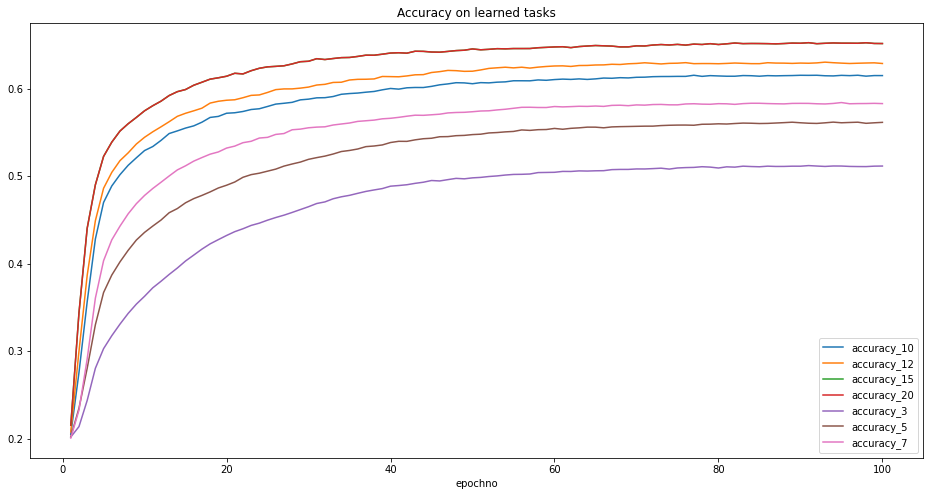

In [114]:
m3 = load_exp('slurm_supsup_basis_gpu_3_results.csv', 3).rename(columns={'accuracy': 'accuracy_3', 'train_loss': 'train_loss_3', 'test_loss': 'test_loss_3', 'num_masks': 'num_masks_3', 'is_learned': 'is_learned_3'})
m5 = load_exp(('slurm_supsup_basis_gpu_5_results.csv', 5)).rename(columns={'accuracy': 'accuracy_5', 'train_loss': 'train_loss_5', 'test_loss': 'test_loss_5', 'num_masks': 'num_masks_5', 'is_learned': 'is_learned_5'})
m7 = load_exp(('slurm_supsup_basis_gpu_7_results.csv', 7)).rename(columns={'accuracy': 'accuracy_7', 'train_loss': 'train_loss_7', 'test_loss': 'test_loss_7', 'num_masks': 'num_masks_7', 'is_learned': 'is_learned_7'})
m10 = load_exp(('slurm_supsup_basis_gpu_10_results.csv', 10)).rename(columns={'accuracy': 'accuracy_10', 'train_loss': 'train_loss_10', 'test_loss': 'test_loss_10', 'num_masks': 'num_masks_10', 'is_learned': 'is_learned_10'})
m12 = load_exp(('slurm_supsup_basis_gpu_12_results.csv', 12)).rename(columns={'accuracy': 'accuracy_12', 'train_loss': 'train_loss_12', 'test_loss': 'test_loss_12', 'num_masks': 'num_masks_12', 'is_learned': 'is_learned_12'})
m15 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 15)).rename(columns={'accuracy': 'accuracy_15', 'train_loss': 'train_loss_15', 'test_loss': 'test_loss_15', 'num_masks': 'num_masks_15', 'is_learned': 'is_learned_15'})
m20 = load_exp(('slurm_supsup_basis_gpu_15_results.csv', 20)).rename(columns={'accuracy': 'accuracy_20', 'train_loss': 'train_loss_20', 'test_loss': 'test_loss_20', 'num_masks': 'num_masks_20', 'is_learned': 'is_learned_20'})

merged = m3.merge(m5, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m7, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m10, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m12, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m15, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])\
     .merge(m20, on=['exp_no', 'seed_val', 'sparsity', 'task', 'epochno', 'ID'])

merged.pivot_table(values=[c for c in merged.columns if c.startswith('accuracy')], index='epochno', columns=['task']).mean(axis=1, level=0)\
     .plot(title="Accuracy on learned tasks", figsize=(16,8))

plt.show()

In [155]:
baseline.groupby(['Sparsity'])['Best Val'].mean().mean()

0.8887708333333334

In [164]:
df = pd.concat([load_exp('slurm_supsup_basis_gpu_randmask_%i_results.csv' % i, i) for i in [3,5,7,10,12,15]])

<AxesSubplot:xlabel='num_masks'>

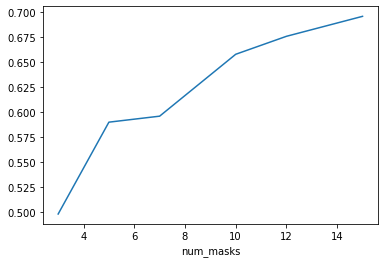

In [165]:
acc = pd.concat([df[~df['is_learned']].groupby(['num_masks'])[['accuracy']].max(), \
           df[df['is_learned']].groupby(['num_masks'])[['accuracy']].max()], axis=1)
acc.columns = ['unlearned', 'learned']
acc['unlearned'].plot()

In [281]:
basis['is_learned'] = basis['Task'] < basis['Num Masks']
basis_h['is_learned'] = basis_h['Task'] < basis_h['Num Masks']

In [282]:
basis[~basis['is_learned']].groupby(['Sparsity'])['Best Val'].mean()

Sparsity
1     0.613612
5     0.619030
20    0.637522
25    0.642787
30    0.641551
50    0.645130
60    0.642677
75    0.644566
Name: Best Val, dtype: float64

In [283]:
basis_sm[basis_sm['Task'] > 0]['Best Val'].mean()

0.21370394736842108

In [284]:
basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15]

Num Masks
3     0.570682
5     0.619679
7     0.641024
10    0.680912
12    0.685236
15    0.719063
Name: Best Val, dtype: float64

In [288]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Text(0, 0.5, 'Accuracy')

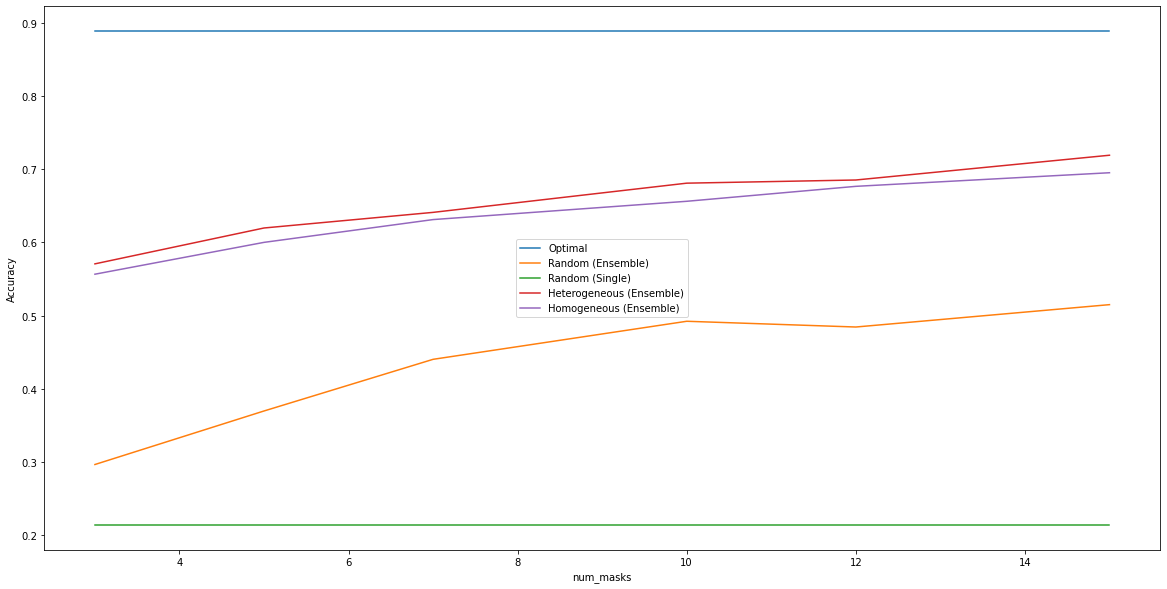

In [307]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
acc = pd.concat([df[~df['is_learned']].groupby(['num_masks'])[['accuracy']].mean(), \
           df[df['is_learned']].groupby(['num_masks'])[['accuracy']].mean()], axis=1)
acc.columns = ['Random (Ensemble)', 'Random Learned']
acc['Optimal'] = baseline.groupby(['Sparsity'])['Best Val'].mean().mean()
acc['Random (Single)'] = basis_sm[basis_sm['Task'] > 0]['Best Val'].mean()
acc['Random (Single); Hybrid'] = basis_sm_h[basis_sm_h['Task'] > 0]['Best Val'].mean()
acc = acc.join(basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble)'})
acc = acc.join(basis_st[basis_st['Task'] > basis_st['Num Masks']].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble)'
})
acc = acc.join(basis_st_h[basis_st_h['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble); Hybrid'
})
acc = acc.join(basis_h[~basis_h['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble); Hybrid'})
# acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Random (Single); Hybrid', 'Heterogeneous (Ensemble)', \
#      'Homogeneous (Ensemble)', 'Homogeneous (Ensemble); Hybrid', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Heterogeneous (Ensemble)', \
     'Homogeneous (Ensemble)']].plot(ax=ax)
# basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
# basis_st[basis_st['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
ax.set_ylabel('Accuracy')

In [ ]:
df['sparsity'] == 4

Text(0, 0.5, 'Accuracy')

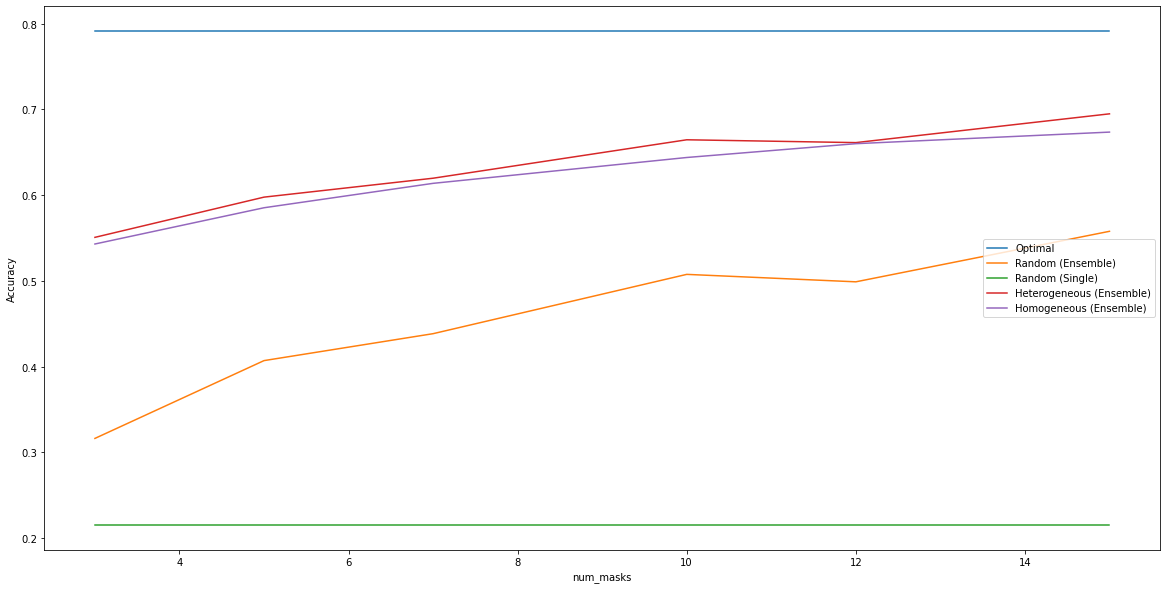

In [305]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
acc = pd.concat([df[(df['sparsity'] == 1) & (~df['is_learned'])].groupby(['num_masks'])[['accuracy']].mean(), \
           df[df['is_learned']].groupby(['num_masks'])[['accuracy']].mean()], axis=1)
acc.columns = ['Random (Ensemble)', 'Random Learned']
acc['Optimal'] = baseline[baseline['Sparsity'] == 1].groupby(['Sparsity'])['Best Val'].mean().mean()
acc['Random (Single)'] = basis_sm[(basis_sm['Sparsity'] == 1) & (basis_sm['Task'] > 0)]['Best Val'].mean()
# acc['Random (Single); Hybrid'] = basis_sm_h[(basis_sm_h['Sparsity'] == 1) & (basis_sm_h['Task'] > 0)]['Best Val'].mean()
acc = acc.join(basis[(basis['Sparsity'] == 1) & (~basis['is_learned'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble)'})
acc = acc.join(basis_st[(basis_st['Sparsity'] == 1) & (basis_st['Task'] > basis_st['Num Masks'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble)'
})
# acc = acc.join(basis_st_h[(basis_st_h['Sparsity'] == 1) & (basis_st_h['Task'] > 0)].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
# .rename(columns={
#     'Best Val': 'Homogeneous (Ensemble); Hybrid'
# })
# acc = acc.join(basis_h[(basis_h['Sparsity'] == 1) & (~basis_h['is_learned'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
# .rename(columns={'Best Val': 'Heterogeneous (Ensemble); Hybrid'})
# acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Random (Single); Hybrid', 'Heterogeneous (Ensemble)', \
#      'Homogeneous (Ensemble)', 'Homogeneous (Ensemble); Hybrid', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Heterogeneous (Ensemble)', \
     'Homogeneous (Ensemble)']].plot(ax=ax)
# basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
# basis_st[basis_st['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

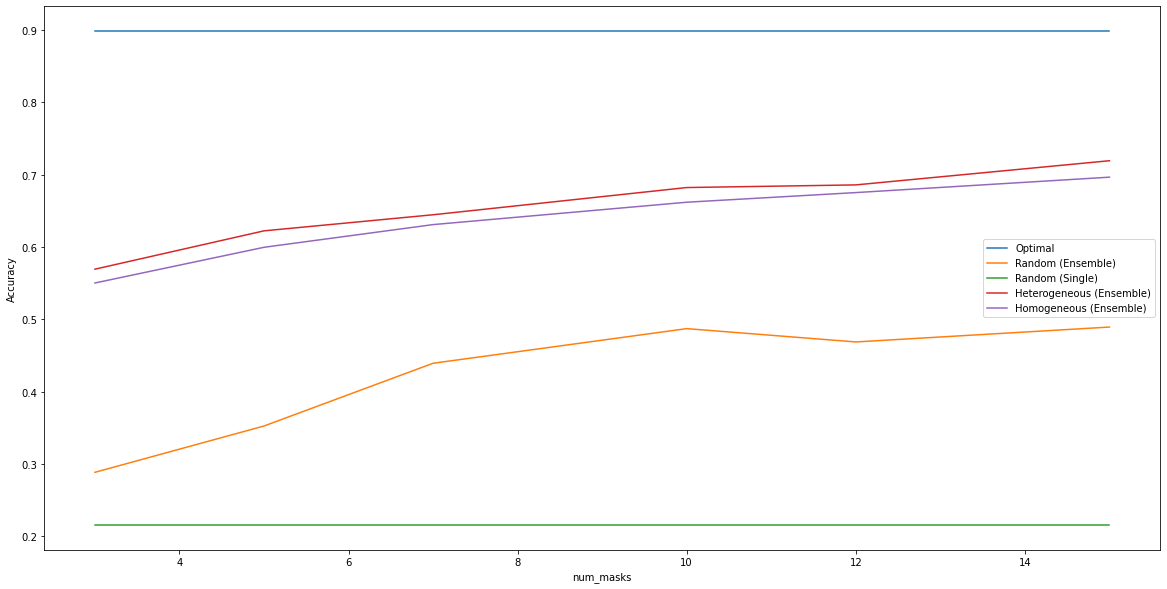

In [308]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
acc = pd.concat([df[(df['sparsity'] == 16) & (~df['is_learned'])].groupby(['num_masks'])[['accuracy']].mean(), \
           df[df['is_learned']].groupby(['num_masks'])[['accuracy']].mean()], axis=1)
acc.columns = ['Random (Ensemble)', 'Random Learned']
acc['Optimal'] = baseline[baseline['Sparsity'] == 20].groupby(['Sparsity'])['Best Val'].mean().mean()
acc['Random (Single)'] = basis_sm[(basis_sm['Sparsity'] == 20) & (basis_sm['Task'] > 0)]['Best Val'].mean()
acc['Random (Single); Hybrid'] = basis_sm_h[(basis_sm_h['Sparsity'] == 20) & (basis_sm_h['Task'] > 0)]['Best Val'].mean()
acc = acc.join(basis[(basis['Sparsity'] == 20) & (~basis['is_learned'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble)'})
acc = acc.join(basis_st[(basis_st['Sparsity'] == 20) & (basis_st['Task'] > basis_st['Num Masks'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble)'
})
acc = acc.join(basis_st_h[(basis_st_h['Sparsity'] == 20) & (basis_st_h['Task'] > 0)].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble); Hybrid'
})
acc = acc.join(basis_h[(basis_h['Sparsity'] == 20) & (~basis_h['is_learned'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble); Hybrid'})
# acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Random (Single); Hybrid', 'Heterogeneous (Ensemble)', \
#      'Homogeneous (Ensemble)', 'Homogeneous (Ensemble); Hybrid', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Heterogeneous (Ensemble)', \
     'Homogeneous (Ensemble)']].plot(ax=ax)
# basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
# basis_st[basis_st['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

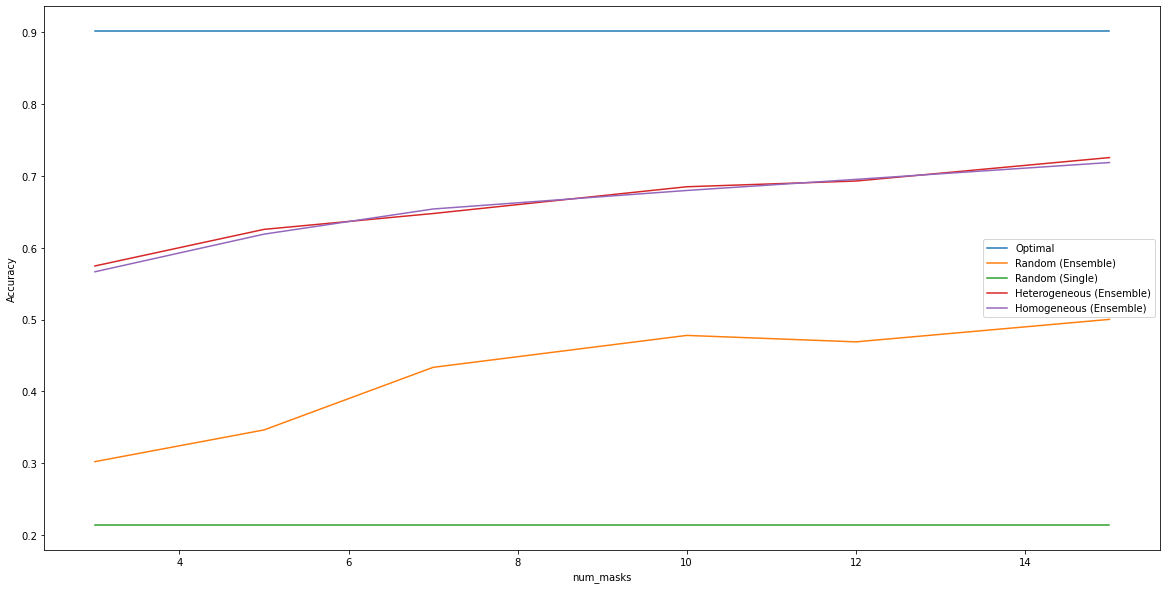

In [309]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
acc = pd.concat([df[(df['sparsity'] == 32) & (~df['is_learned'])].groupby(['num_masks'])[['accuracy']].mean(), \
           df[df['is_learned']].groupby(['num_masks'])[['accuracy']].mean()], axis=1)
acc.columns = ['Random (Ensemble)', 'Random Learned']
acc['Optimal'] = baseline[baseline['Sparsity'] == 30].groupby(['Sparsity'])['Best Val'].mean().mean()
acc['Random (Single)'] = basis_sm[(basis_sm['Sparsity'] == 30) & (basis_sm['Task'] > 0)]['Best Val'].mean()
acc['Random (Single); Hybrid'] = basis_sm_h[(basis_sm_h['Sparsity'] == 30) & (basis_sm_h['Task'] > 0)]['Best Val'].mean()
acc = acc.join(basis[(basis['Sparsity'] == 30) & (~basis['is_learned'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble)'})
acc = acc.join(basis_st[(basis_st['Sparsity'] == 30) & (basis_st['Task'] > 0)].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble)'
})
acc = acc.join(basis_st_h[(basis_st_h['Sparsity'] == 30) & (basis_st_h['Task'] > basis_st_h['Num Masks'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble); Hybrid'
})
acc = acc.join(basis_h[(basis_h['Sparsity'] == 30) & (~basis_h['is_learned'])].groupby(['Num Masks'])['Best Val'].mean().loc[:15])\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble); Hybrid'})
# acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Random (Single); Hybrid', 'Heterogeneous (Ensemble)', \
#      'Homogeneous (Ensemble)', 'Homogeneous (Ensemble); Hybrid', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Heterogeneous (Ensemble)', \
     'Homogeneous (Ensemble)']].plot(ax=ax)
# basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
# basis_st[basis_st['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

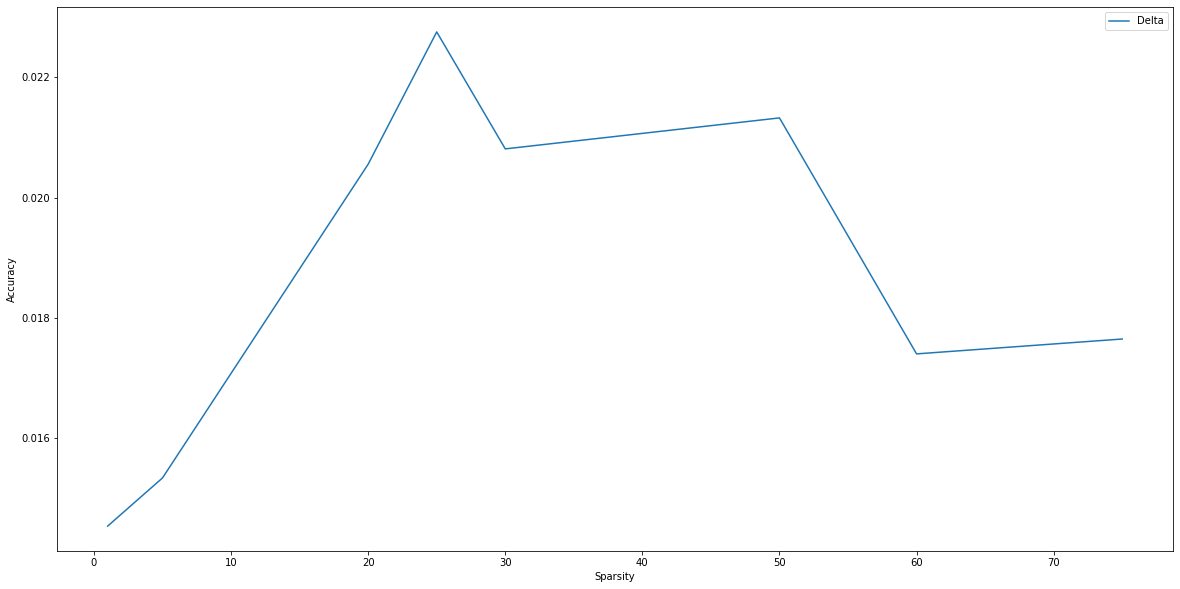

In [320]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
acc = pd.concat([basis[(~basis['is_learned'])].groupby(['Sparsity'])['Best Val'].mean(), \
            basis_st[(basis_st['Task'] > basis_st['Num Masks'])].groupby(['Sparsity'])['Best Val'].mean()], axis=1)
acc.columns = ['Heterogeneous (Ensemble)', 'Homogeneous (Ensemble)']
acc['Delta'] = acc['Heterogeneous (Ensemble)'] - acc['Homogeneous (Ensemble)']

# acc[['Optimal', 'Random (Ensemble)', 'Random (Single)', 'Random (Single); Hybrid', 'Heterogeneous (Ensemble)', \
#      'Homogeneous (Ensemble)', 'Homogeneous (Ensemble); Hybrid', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
acc[['Delta']].plot(ax=ax)
# basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
# basis_st[basis_st['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

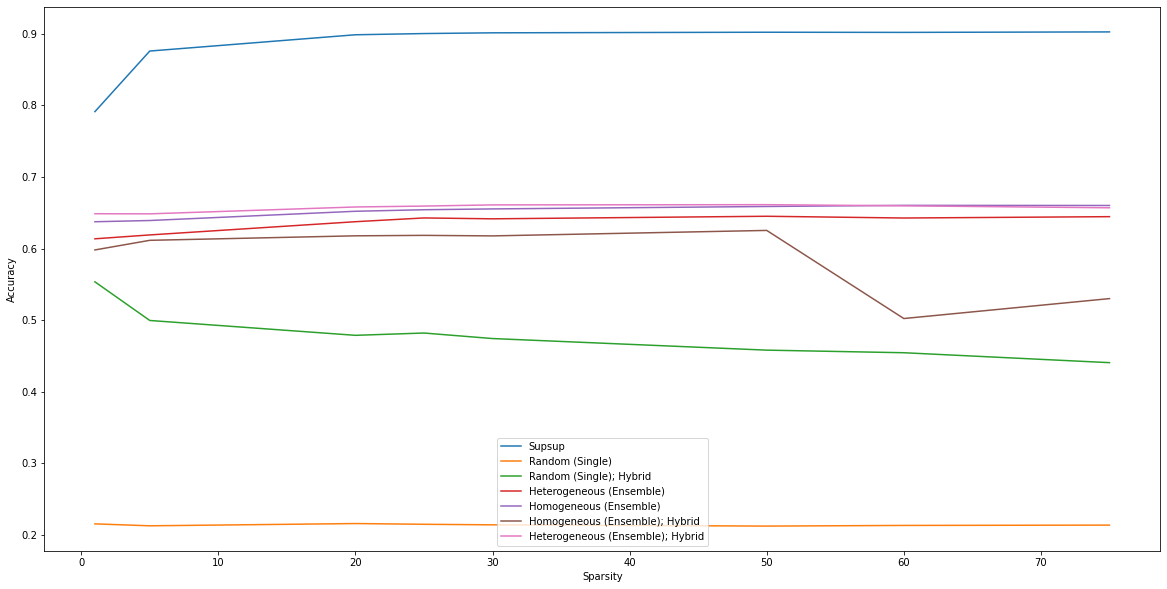

In [290]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
# acc = pd.concat([df[~df['is_learned']].groupby(['sparsity'])[['accuracy']].mean(), \
#            df[df['is_learned']].groupby(['sparsity'])[['accuracy']].mean()], axis=1)
# acc.columns = ['Random (Ensemble)', 'Random Learned']
acc = baseline.groupby(['Sparsity'])['Best Val'].mean()
acc = pd.concat([acc, basis_sm[basis_sm['Task'] > 0].groupby(['Sparsity'])['Best Val'].mean()\
                , basis_sm_h[basis_sm_h['Task'] > 0].groupby(['Sparsity'])['Best Val'].mean()], axis=1)
acc.columns = ['Supsup', 'Random (Single)', 'Random (Single); Hybrid']
acc = acc.join(basis[~basis['is_learned']].groupby(['Sparsity'])['Best Val'].mean())\
.rename(columns={'Best Val': 'Heterogeneous (Ensemble)'})
acc = acc.join(basis_st[basis_st['Task'] > 0].groupby(['Sparsity'])['Best Val'].mean(), how='inner')\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble)'
})
acc = acc.join(basis_st_h[basis_st_h['Task'] > 0].groupby(['Sparsity'])['Best Val'].mean(), how='inner')\
.rename(columns={
    'Best Val': 'Homogeneous (Ensemble); Hybrid'
})
acc = acc.join(basis_h[~basis_h['is_learned']].groupby(['Sparsity'])['Best Val'].mean())\
 .rename(columns={'Best Val': 'Heterogeneous (Ensemble); Hybrid'})
# acc[['Supsup', 'Random (Ensemble)', 'Random (Single)', 'Heterogeneous (Ensemble)', \
#      'Homogeneous (Ensemble)', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
acc[['Supsup', 'Random (Single)', 'Random (Single); Hybrid', 'Heterogeneous (Ensemble)', \
     'Homogeneous (Ensemble)', 'Homogeneous (Ensemble); Hybrid', 'Heterogeneous (Ensemble); Hybrid']].plot(ax=ax)
# basis[~basis['is_learned']].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
# basis_st[basis_st['Task'] > 0].groupby(['Num Masks'])['Best Val'].mean().loc[:15].plot(ax=ax)
ax.set_ylabel('Accuracy')

In [274]:
acc.head()

,Supsup,Random (Single),Random (Single); Hybrid,Heterogeneous (Ensemble),Homogeneous (Ensemble),Homogeneous (Ensemble); Hybrid,Heterogeneous (Ensemble); Hybrid
Sparsity,,,,,,,
1,0.791400,0.215105,0.215105,0.613612,0.637470,0.637470,0.648671
5,0.876100,0.212395,0.212395,0.619030,0.639184,0.639184,0.648507
20,0.898850,0.215553,0.215553,0.637522,0.652105,0.652105,0.658123
25,0.900550,0.214526,0.214526,0.642787,0.654254,0.654254,0.659370
30,0.901575,0.213763,0.213763,0.641551,0.655395,0.655395,0.661027


In [219]:
basis_st[basis_st['Task'] > 0].groupby(['Sparsity'])['Best Val'].mean()

Sparsity
1     0.637470
5     0.639184
20    0.652105
25    0.654254
30    0.655395
50    0.658798
60    0.660386
75    0.660202
Name: Best Val, dtype: float64

In [222]:
acc.tail()

,Supsup,Random (Single),Heterogeneous (Ensemble),Homogeneous (Ensemble),Heterogeneous (Ensemble); Hybrid
Sparsity,,,,,
25,0.900550,0.214526,0.642787,0.654254,0.659370
30,0.901575,0.213763,0.641551,0.655395,0.661027
50,0.902400,0.212000,0.645130,0.658798,0.661329
60,0.902175,0.212921,0.642677,0.660386,0.659740
75,0.902850,0.213368,0.644566,0.660202,0.656986


In [237]:
basis_st[(basis_st['Task'] == 0) & (basis_st['Sparsity'] == 5)]

0.6928333333333335

In [ ]:
(basis_st[basis_st['Task'] >= 7].groupby(['Task', 'Sparsity'])['Best Val'].mean() - \
basis[basis['Task'] >= 7].groupby(['Task', 'Sparsity'])['Best Val'].mean()).mean()

In [255]:
(basis_st[basis_st['Task'] >= 3].groupby(['Task', 'Sparsity'])['Best Val'].mean() - \
basis[(basis['Task'] >= 3) & (basis['Task'] >= basis['Num Masks'])].groupby(['Task', 'Sparsity'])['Best Val'].mean()).mean()

0.016777050355864367

In [256]:
(basis_st[basis_st['Task'] >= 5].groupby(['Task', 'Sparsity'])['Best Val'].mean() - \
basis[(basis['Task'] >= 5) & (basis['Task'] >= basis['Num Masks'])].groupby(['Task', 'Sparsity'])['Best Val'].mean()).mean()

0.009816768181090726

In [257]:
(basis_st[basis_st['Task'] >= 7].groupby(['Task', 'Sparsity'])['Best Val'].mean() - \
basis[(basis['Task'] >= 7) & (basis['Task'] >= basis['Num Masks'])].groupby(['Task', 'Sparsity'])['Best Val'].mean()).mean()

0.0019119761063867377

In [258]:
(basis_st[basis_st['Task'] >= 10].groupby(['Task', 'Sparsity'])['Best Val'].mean() - \
basis[(basis['Task'] >= 10) & (basis['Task'] >= basis['Num Masks'])].groupby(['Task', 'Sparsity'])['Best Val'].mean()).mean()

-0.007018597728363898

In [259]:
(basis_st[basis_st['Task'] >= 15].groupby(['Task', 'Sparsity'])['Best Val'].mean() - \
basis[basis['Task'] >= 15].groupby(['Task', 'Sparsity'])['Best Val'].mean()).mean()

-0.027181878769378758

In [240]:
(basis_st.groupby(['Task', 'Sparsity'])['Best Val'].mean() - basis.groupby(['Task', 'Sparsity'])['Best Val'].mean())

-0.04561542034354535

In [227]:
.#basis[basis['Task'] >= basis['Num Masks']].groupby(['Sparsity'])['Best Val'].mean()
basis[basis['Task'] == 14].groupby(['Sparsity'])['Best Val'].mean()

Sparsity
1     0.648667
5     0.645778
20    0.660429
25    0.664519
30    0.660143
50    0.678000
60    0.674889
75    0.663231
Name: Best Val, dtype: float64

In [115]:
merged.head()

,ID,exp_no,seed_val,sparsity,task,epochno,train_loss_3,test_loss_3,accuracy_3,num_masks_3,...,accuracy_15,num_masks_15,seed_model_y,is_learned_15,train_loss_20,test_loss_20,accuracy_20,num_masks_20,seed_model,is_learned_20
0,basis-supsup,0,0,1,0,1,1.690885,2.6390,0.212,3,...,0.196,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True,1.558912,1.6320,0.196,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
1,basis-supsup,0,0,1,0,2,1.723144,1.7438,0.306,3,...,0.330,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True,1.507469,1.5308,0.330,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
2,basis-supsup,0,0,1,0,3,1.500502,1.5201,0.422,3,...,0.402,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True,1.382464,1.4276,0.402,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
3,basis-supsup,0,0,1,0,4,1.392170,1.4357,0.464,3,...,0.474,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True,1.296202,1.3457,0.474,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
4,basis-supsup,0,0,1,0,5,1.341735,1.3604,0.482,3,...,0.476,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True,1.414568,1.2940,0.476,15,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True


In [120]:
merged.columns

Index(['ID', 'exp_no', 'seed_val', 'sparsity', 'task', 'epochno',
       'train_loss_3', 'test_loss_3', 'accuracy_3', 'num_masks_3',
       'seed_model_x', 'is_learned_3', 'train_loss_5', 'test_loss_5',
       'accuracy_5', 'num_masks_5', 'seed_model_y', 'is_learned_5',
       'train_loss_7', 'test_loss_7', 'accuracy_7', 'num_masks_7',
       'seed_model_x', 'is_learned_7', 'train_loss_10', 'test_loss_10',
       'accuracy_10', 'num_masks_10', 'seed_model_y', 'is_learned_10',
       'train_loss_12', 'test_loss_12', 'accuracy_12', 'num_masks_12',
       'seed_model_x', 'is_learned_12', 'train_loss_15', 'test_loss_15',
       'accuracy_15', 'num_masks_15', 'seed_model_y', 'is_learned_15',
       'train_loss_20', 'test_loss_20', 'accuracy_20', 'num_masks_20',
       'seed_model', 'is_learned_20'],
      dtype='object')

In [123]:
m3

,ID,exp_no,seed_val,sparsity,task,epochno,train_loss_3,test_loss_3,accuracy_3,num_masks_3,seed_model,is_learned_3
0,basis-supsup,0,0,1,0,1,1.690885,2.6390,0.212,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
1,basis-supsup,0,0,1,0,2,1.723144,1.7438,0.306,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
2,basis-supsup,0,0,1,0,3,1.500502,1.5201,0.422,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
3,basis-supsup,0,0,1,0,4,1.392170,1.4357,0.464,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
4,basis-supsup,0,0,1,0,5,1.341735,1.3604,0.482,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,basis-supsup,5,0,32,19,96,1.482544,1.3914,0.410,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,False
11996,basis-supsup,5,0,32,19,97,1.475728,1.3902,0.410,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,False
11997,basis-supsup,5,0,32,19,98,1.411438,1.3893,0.410,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,False
11998,basis-supsup,5,0,32,19,99,1.474202,1.3866,0.412,3,/scratch/db4045/runs/dhrupad_runs_gpu/SupsupSe...,False


In [122]:
merged.seed_val.unique()

array([0])

In [119]:
merged.groupby(['sparsity', 'task']).max()['accuracy15']

KeyError: 'accuracy15'